# Gestion des NAs et ajout de variables


In [ ]:
# 02/05/2024 : Correction des coordonnées des stations intervenant sur l'incident
# 15/05/2024 : calcul de la distance geodesic entre la 1er station intervenenant et lieu de l'incident
# certaines coordonnées sont nulles : recalcul avec earsting/northing ou supprime
# 12/06/2024 : si on supprime les lignes où il n'y a pas de coordonnéé, cela supprime la modalité "dwelling" de PropertyCategory
# Création de deux versions de dataFrame :
# data frame V1 : suppression des lignes sans coordonnées d'incident et de station
# data frame V2 : récupération des coordonnées de l'incident approxiamative avec earsting/northing


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# charge du dataFrame Mobilisation 

dico = {"IncidentNumber" : 'str'}

df = pd.read_csv("Data/Data_Mergees.csv", dtype = dico)

# en datetime
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'])
df['TimeOfCall'] = pd.to_datetime(df['TimeOfCall'])

In [4]:
pd.set_option('max_colwidth',50)
pd.set_option('display.max_columns',50)
df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion
0,235138081,2009-01-01,2009,1900-01-01 00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,NaN,NaN,319,NaN,H,253.0,89.0,342.0,NaN,H
1,2091,2009-01-01,2009,1900-01-01 00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0,151.0,157.0,308,NaN,A,NaN,NaN,NaN,NaN,NaN
2,3091,2009-01-01,2009,1900-01-01 00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0,108.0,102.0,210,NaN,G,NaN,NaN,NaN,NaN,NaN
3,5091,2009-01-01,2009,1900-01-01 00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0,114.0,119.0,233,NaN,A,142.0,108.0,250.0,NaN,A
4,6091,2009-01-01,2009,1900-01-01 00:06:03,0,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW5,0.000000e+00,20499122.0,E09000007,CAMDEN,Camden,E05013663,Kentish Town North,Kentish Town North,NaN,NaN,529450,185250,NaN,NaN,London,Kentish Town,172.0,Kentish Town,222.0,Kentish Town,1.0,2.0,2,60,255,1.0,83.0,89.0,172,NaN,A,95.0,127.0,222.0,NaN,A


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507482 entries, 0 to 1507481
Data columns (total 49 columns):
 #   Column                                  Non-Null Count    Dtype         
---  ------                                  --------------    -----         
 0   IncidentNumber                          1507482 non-null  object        
 1   DateOfCall                              1507482 non-null  datetime64[ns]
 2   CalYear                                 1507482 non-null  int64         
 3   TimeOfCall                              1507482 non-null  datetime64[ns]
 4   HourOfCall                              1507482 non-null  int64         
 5   IncidentGroup                           1507482 non-null  object        
 6   StopCodeDescription                     1507482 non-null  object        
 7   SpecialServiceType                      423552 non-null   object        
 8   PropertyCategory                        1507482 non-null  object        
 9   PropertyType            

In [21]:
df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1083930
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              719547
Postcode_district                               0
UPRN                                       128813
USRN                                       147410
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               151
IncGeo_WardName                               151


### Suppression des colonnes inutiles

In [4]:
col_a_supp = ['FRS','UPRN','USRN','ProperCase','IncGeo_BoroughCode','IncGeo_WardCode','IncGeo_WardName']
df = df.drop(labels = col_a_supp, axis = 1)


In [63]:
df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1083930
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              719547
Postcode_district                               0
IncGeo_BoroughName                              0
IncGeo_WardNameNew                            151
Easting_m                                  719547
Northing_m                                 719547
Easting_rounded                                 0
Northing_rounded                                0
Latitude                                   719547


### Gestion des valeurs extreme ou abberrantes

In [64]:
df.FirstPumpArriving_AttendanceTime.describe().round()

count    1507482.0
mean         318.0
std          139.0
min            1.0
25%          230.0
50%          296.0
75%          378.0
max         1200.0
Name: FirstPumpArriving_AttendanceTime, dtype: float64

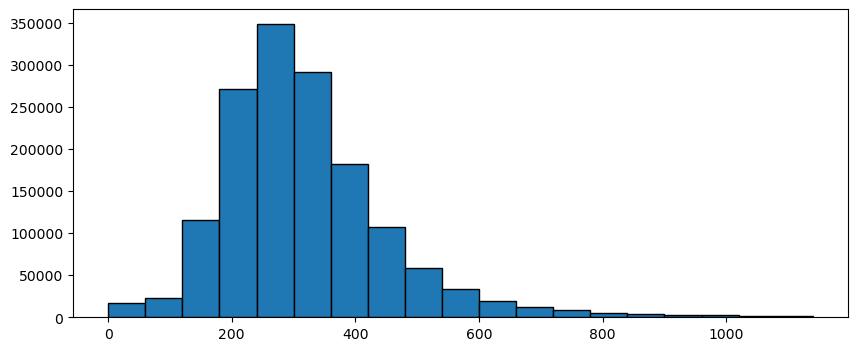

In [6]:
plt.figure(figsize = (10,4))

plt.hist(df.FirstPumpArriving_AttendanceTime,bins = range(0,1200,60), edgecolor = "black")
plt.show()

In [10]:
display(df[df.FirstPumpArriving_AttendanceTime<60])

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion
11,21091,2009-01-01,2009,1900-01-01 00:20:43,0,Special Service,Special Service,Medical Incident,Outdoor,Road surface/pavement,...,NaN,NaN,56,NaN,F,NaN,NaN,NaN,NaN,NaN
702,1326091,2009-01-03,2009,1900-01-01 03:47:13,3,Special Service,Special Service,Flooding,Other Residential,Sheltered Housing : not self contained,...,NaN,NaN,20,NaN,A,NaN,NaN,NaN,NaN,NaN
852,1556091,2009-01-03,2009,1900-01-01 15:11:07,15,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,NaN,NaN,6,NaN,F,NaN,NaN,NaN,NaN,NaN
861,1570091,2009-01-03,2009,1900-01-01 15:31:10,15,Special Service,Special Service,RTC,Road Vehicle,Car,...,NaN,NaN,57,NaN,F,61.0,99.0,160.0,NaN,F
898,1635091,2009-01-03,2009,1900-01-01 17:40:24,17,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),...,NaN,NaN,4,NaN,G,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506954,169494-30102023,2023-10-30,2023,1900-01-01 13:49:04,13,Special Service,Special Service,Assist other agencies,Non Residential,Single shop,...,3.0,1.0,4,NaN,A,NaN,NaN,NaN,NaN,NaN
1506976,169527-30102023,2023-10-30,2023,1900-01-01 15:17:54,15,False Alarm,AFA,NaN,Non Residential,Infant/Primary school,...,NaN,NaN,5,NaN,F,NaN,NaN,NaN,NaN,NaN
1506992,169552-30102023,2023-10-30,2023,1900-01-01 16:13:30,16,False Alarm,AFA,NaN,Non Residential,Leisure Centre,...,3.0,1.0,4,NaN,H,NaN,NaN,NaN,NaN,NaN
1507115,169744-30102023,2023-10-30,2023,1900-01-01 22:21:05,22,Special Service,Special Service,Removal of objects from people,Non Residential,Fire station,...,NaN,NaN,9,NaN,G,NaN,NaN,NaN,NaN,NaN


In [5]:
#Outlier de 1stPumpArriving : Q3 + 1.5*(IQR) et Q1 - 1.5*(IQR)
IQR = (df["FirstPumpArriving_AttendanceTime"].quantile(0.75)) - (df["FirstPumpArriving_AttendanceTime"].quantile(0.25)) 
Out_low = (df["FirstPumpArriving_AttendanceTime"].quantile(0.25)) -1.5*IQR
Out_high = (df["FirstPumpArriving_AttendanceTime"].quantile(0.75)) +1.5*IQR

print(Out_low,Out_high)


8.0 600.0


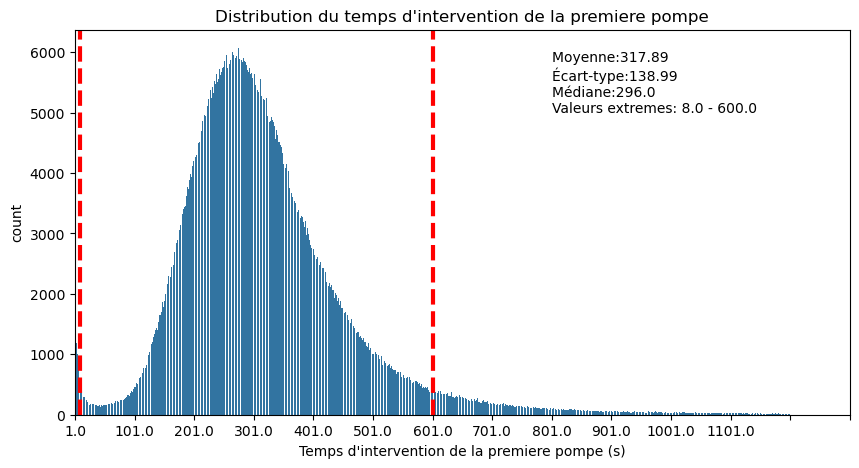

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x = "FirstPumpArriving_AttendanceTime" , data = df)
plt.axvline(x= Out_low, linewidth = 3, c ='red', linestyle = '--')
plt.axvline(x= Out_high, linewidth =3,c='red', linestyle = '--')
plt.text(x=800,y=5000, s = f'Moyenne:{df.FirstPumpArriving_AttendanceTime.mean().round(2)} \nÉcart-type:{df.FirstPumpArriving_AttendanceTime.std().round(2)} \nMédiane:{df.FirstPumpArriving_AttendanceTime.median().round(2)} \nValeurs extremes: {Out_low} - {Out_high}')
plt.xticks(list(range(0,1400,100)))
plt.title("Distribution du temps d'intervention de la premiere pompe")
plt.xlabel("Temps d'intervention de la premiere pompe (s)")

plt.show()

In [148]:
# Faire dataframe avec les temps de réaction inferireur à 60 secondes ==> calcul des distances pour voir si c'est cohérent


### Ajout de variables :  


#### inner/outer london


In [6]:
# Distinction Inner Outer London

Inner_London = ["CAMDEN", "CITY OF LONDON", "HACKNEY", "HAMMERSMITH AND FULHAM", "HARINGEY",
                "ISLINGTON", "KENSINGTON AND CHELSEA",
                "LAMBETH", "LEWISHAM", "NEWHAM", "SOUTHWARK", "TOWER HAMLETS", "WANDSWORTH" ,"WESTMINSTER"]

Outer_London = ["BARKING AND DAGENHAM", "BARNET", "BEXLEY", "BRENT", "BROMLEY", "CROYDON", 
                "EALING", "ENFIELD", "GREENWICH", "HARROW", "HAVERING", "HILLINGDON", "HOUNSLOW", 
                "KINGSTON UPON THAMES","MERTON", "REDBRIDGE", "RICHMOND UPON THAMES", "SUTTON", "WALTHAM FOREST"]

In [7]:
# Ajout de la zone de Londres

London_Zone = []

for i in df.IncGeo_BoroughName :
    if i in Inner_London:
        London_Zone.append("Inner London")
    elif i in Outer_London : 
        London_Zone.append("Outer London")

df["London_Zone"] = London_Zone

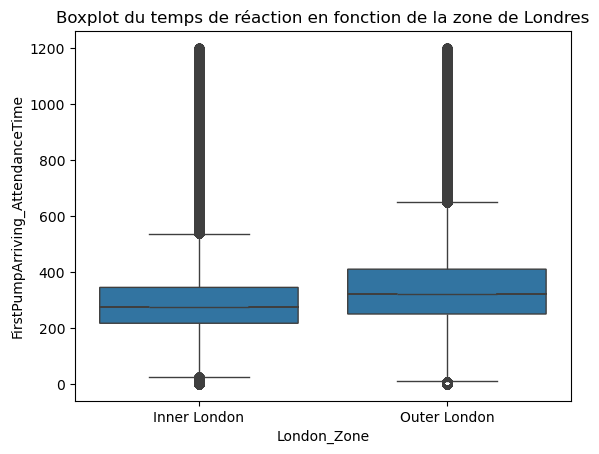

In [8]:
# temps de réponse moyen en fonction de la zone
sns.boxplot(y = df.FirstPumpArriving_AttendanceTime, x= df.London_Zone, notch=True)
#plt.yticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title("Boxplot du temps de réaction en fonction de la zone de Londres")
plt.show()


In [9]:
zone = df.groupby("London_Zone")[["FirstPumpArriving_AttendanceTime","SecondPumpArriving_AttendanceTime"]].agg(["mean","std","median"])

display(zone)                                                                                                 

print(tuple(zone.loc["Inner London","FirstPumpArriving_AttendanceTime"]/60))
print(tuple(zone.loc["Outer London","FirstPumpArriving_AttendanceTime"]/60))


FirstPumpArriving_AttendanceTime                     \
                                         mean         std median   
London_Zone                                                        
Inner London                       293.532872  123.830994  275.0   
Outer London                       344.229032  149.304457  322.0   

             SecondPumpArriving_AttendanceTime                     
                                          mean         std median  
London_Zone                                                        
Inner London                        362.040926  135.311663  339.0  
Outer London                        432.422332  164.547090  408.0

(4.8922145367748024, 2.0638498992166645, 4.583333333333333)
(5.737150526649069, 2.488407609456977, 5.366666666666666)


In [11]:
inner_mean,inner_std,inner_median = tuple(zone.loc["Inner London","FirstPumpArriving_AttendanceTime"]/60) 

outer_mean,outer_std,outer_median = tuple(zone.loc["Outer London","FirstPumpArriving_AttendanceTime"]/60) 

# map pour appliquer fonction sur les valeurs du df
zone["FirstPumpArriving_AttendanceTime"].map(lambda x :divmod(x,60))

,mean,std,median
London_Zone,,,
Inner London,"(4.0, 53.53287220648815)","(2.0, 3.8309939529998616)","(4.0, 35.0)"
Outer London,"(5.0, 44.22903159894412)","(2.0, 29.30445656741861)","(5.0, 22.0)"


In [57]:
tuple((zone.loc["Inner London","FirstPumpArriving_AttendanceTime"]/60).round(3))

(4.892, 2.064, 4.583)

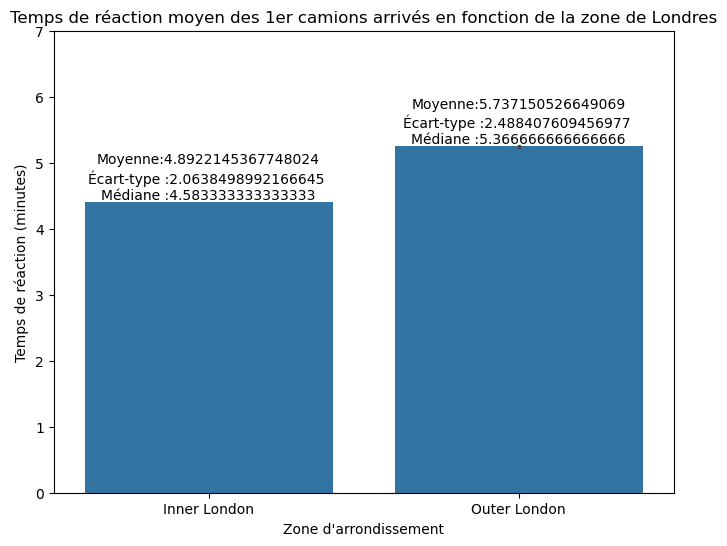

In [12]:
#fig,ax = plt.figure(figsize = (10,8))
fig,ax = plt.subplots(figsize=(8, 6))
sns.barplot(data =df, y = df.FirstPumpArriving_AttendanceTime//60,x = df.London_Zone,
             errorbar = 'ci')

plt.xlabel("Zone d'arrondissement")
plt.ylabel("Temps de réaction (minutes)")
plt.title("Temps de réaction moyen des 1er camions arrivés en fonction de la zone de Londres")

#plt.annotate(f'Moyenne:{inner_mean}\nÉcart-type :{inner_std} \nMédiane :{inner_median}' ,xy=(0.003,5.8))
#plt.annotate(f'Moyenne:{outer_mean}\nÉcart-type :{outer_std} \nMédiane :{outer_median}', xy =(0.8,5.8))

ax.bar_label(ax.containers[0],labels = [f'Moyenne:{inner_mean}\nÉcart-type :{inner_std} \nMédiane :{inner_median}', f'Moyenne:{outer_mean}\nÉcart-type :{outer_std} \nMédiane :{outer_median}'] ,fmt='Mean:')

plt.ylim(0,7)
#plt.savefig("Plot/Temps reponse 1er camion fonction de zone de London.png")

plt.show()

# Les brigades intervenant en inner London semble en moyenne plus rapides que celle intervenant en outer London


In [13]:
inner_mean,inner_std,inner_median = tuple(zone.loc["Inner London","FirstPumpArriving_AttendanceTime"].map(lambda x : "%02d:%02d" % divmod(x,60)))
outer_mean,outer_std,outer_median = tuple(zone.loc["Outer London","FirstPumpArriving_AttendanceTime"].map(lambda x : "%02d:%02d" % divmod(x,60)))


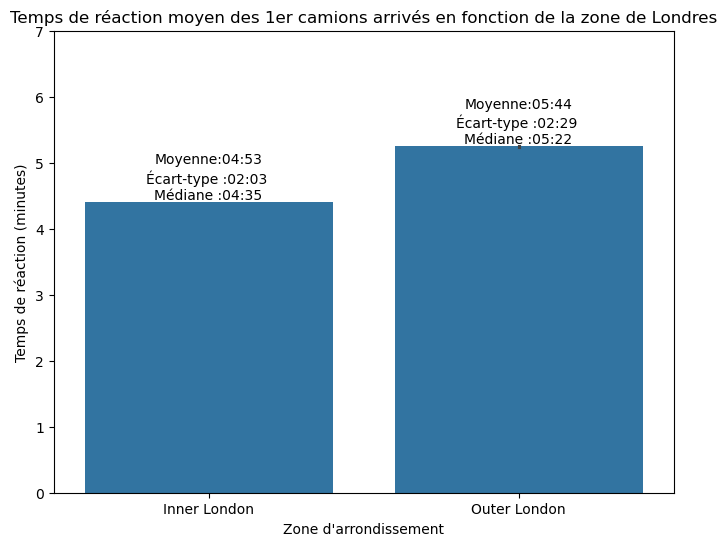

In [14]:
#fig,ax = plt.figure(figsize = (10,8))
fig,ax = plt.subplots(figsize=(8, 6))
sns.barplot(data =df, y = df.FirstPumpArriving_AttendanceTime//60,x = df.London_Zone,
             errorbar = 'ci')

plt.xlabel("Zone d'arrondissement")
plt.ylabel("Temps de réaction (minutes)")
plt.title("Temps de réaction moyen des 1er camions arrivés en fonction de la zone de Londres")

ax.bar_label(ax.containers[0],labels = [f'Moyenne:{inner_mean}\nÉcart-type :{inner_std} \nMédiane :{inner_median}', f'Moyenne:{outer_mean}\nÉcart-type :{outer_std} \nMédiane :{outer_median}'] ,fmt='Mean:')

plt.ylim(0,7)
#plt.savefig("Plot/Temps reponse 1er camion fonction de zone de London.png")

plt.show()

# Les brigades intervenant en inner London semble en moyenne plus rapides que celle intervenant en outer London


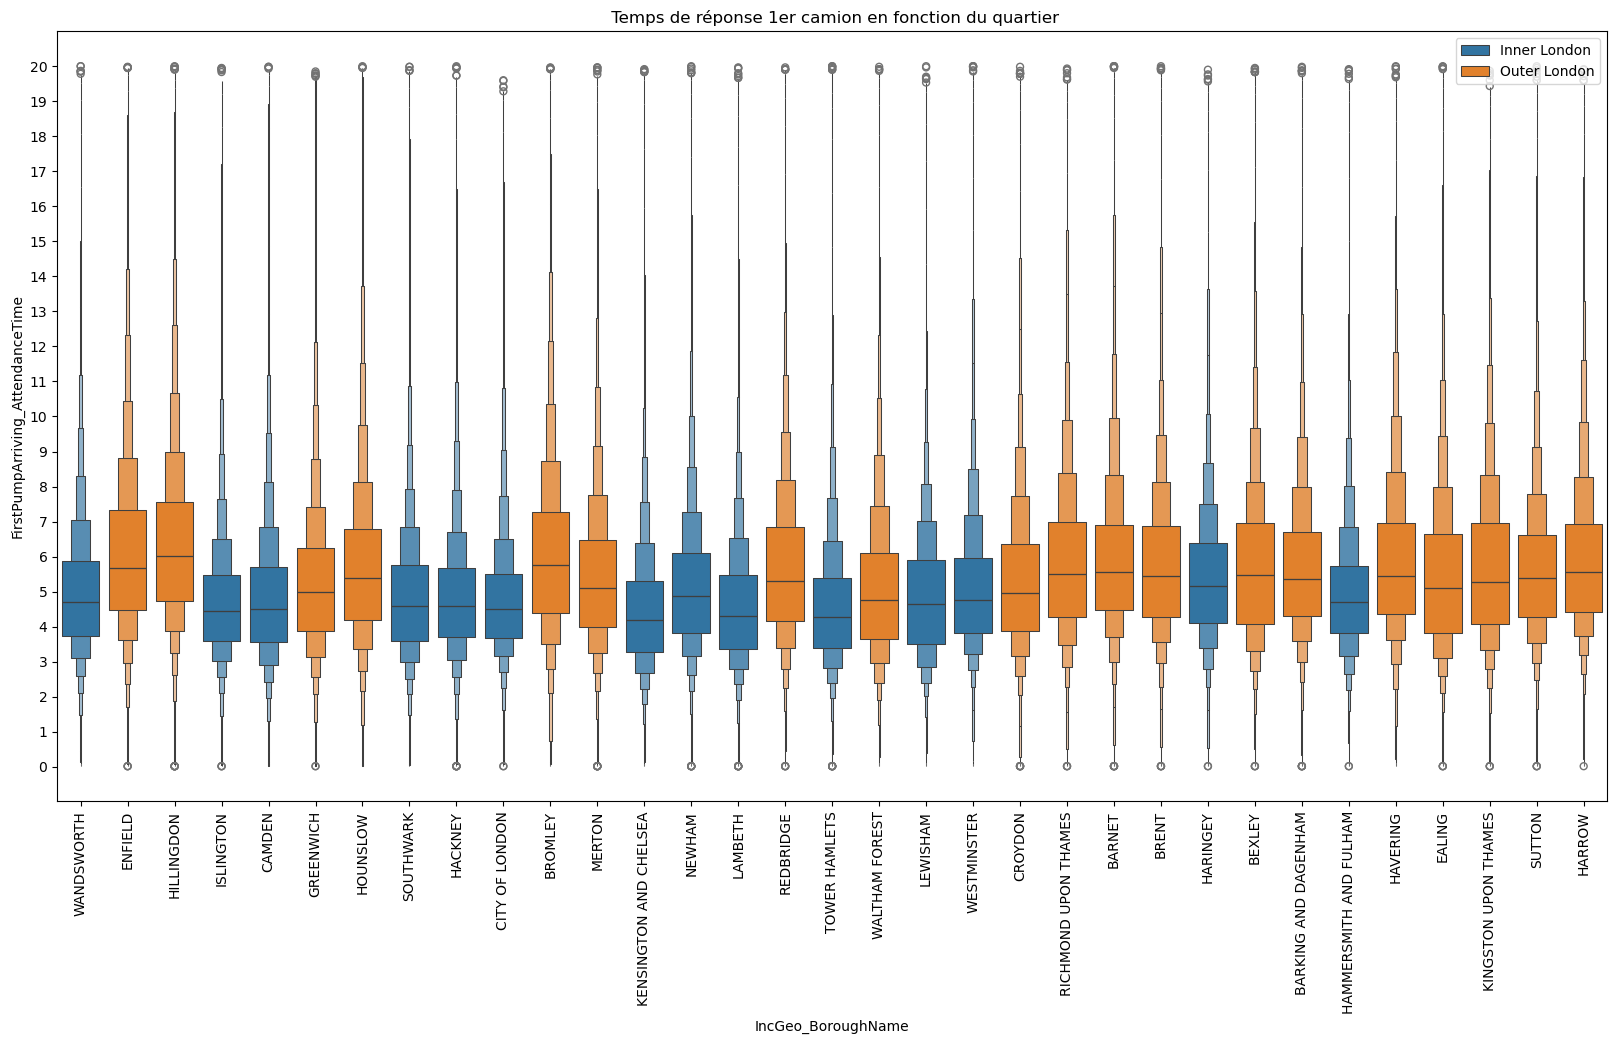

In [15]:
# Temps de réponse 1er camion en fonction du quartier
plt.figure(figsize = (20,10))
sns.boxenplot(y = df["FirstPumpArriving_AttendanceTime"] , x= "IncGeo_BoroughName"
              ,data = df, hue = "London_Zone")
plt.xticks(rotation=90)
plt.yticks(ticks = range(0,1260,60),labels= range(0,21))
plt.title(" Temps de réponse 1er camion en fonction du quartier")
plt.legend(loc = "upper right")
plt.show()

# Inner London : a peu pres les memes temps pour tous. 1 quartier qui se démarque avec un médiane un peu plus élevée
# Les variances plus ou moins similaires sauf pour un ou la dispersion est plus importante
# Outter London : Plus de quartiers qui ont des médianes et dispersions différentes.


In [16]:
df.groupby('London_Zone')["FirstPumpArriving_AttendanceTime"].agg(['mean','var','std','count'])
# Plus de temps de réponse en outer London et plus de variabilité. (visible dans plot des quartier)

,mean,var,std,count
London_Zone,,,,
Inner London,291.607505,16940.186491,130.154472,389129
Outer London,348.965266,25564.719196,159.889709,398806


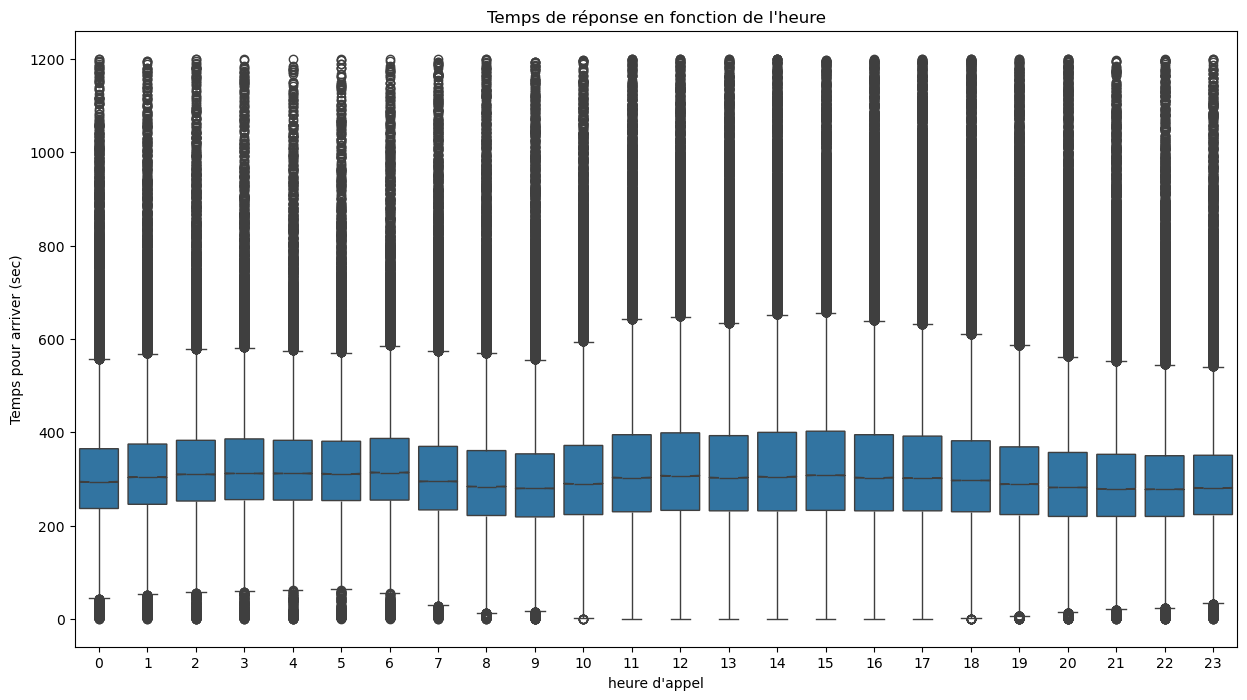

In [10]:
# Box du temps de réponse en focntion de l'heure de l'appel
plt.figure(figsize =(15,8))
sns.boxplot(y = df.FirstPumpArriving_AttendanceTime , x = "HourOfCall",
            data = df,notch=True)

plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (sec)")
plt.title("Temps de réponse en fonction de l'heure")
plt.show()
# Rush Hours : Matin : 7-10  Aprem : 17-19

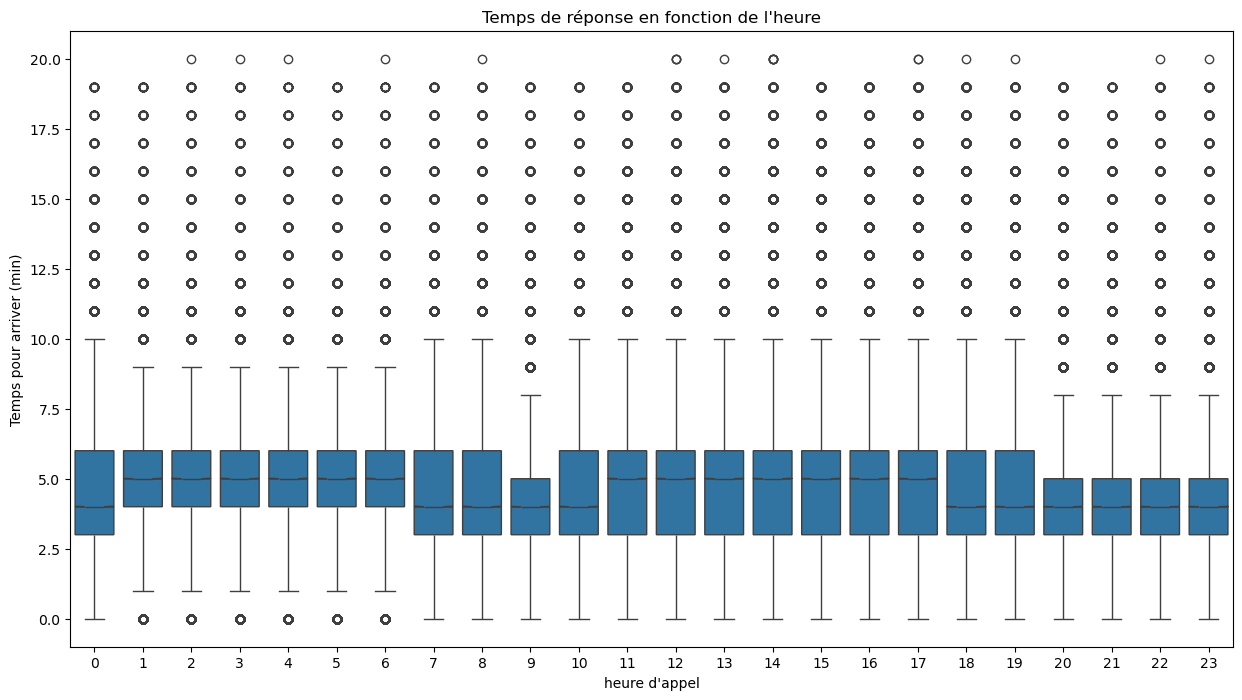

In [29]:
# Box du temps de réponse en focntion de l'heure de l'appel
plt.figure(figsize =(15,8))
sns.boxplot(y = df.FirstPumpArriving_AttendanceTime//60 , x = "HourOfCall",
            data = df,notch=True)

plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (min)")
plt.title("Temps de réponse en fonction de l'heure")
plt.show()
# Rush Hours : Matin : 7-10  Aprem : 17-19

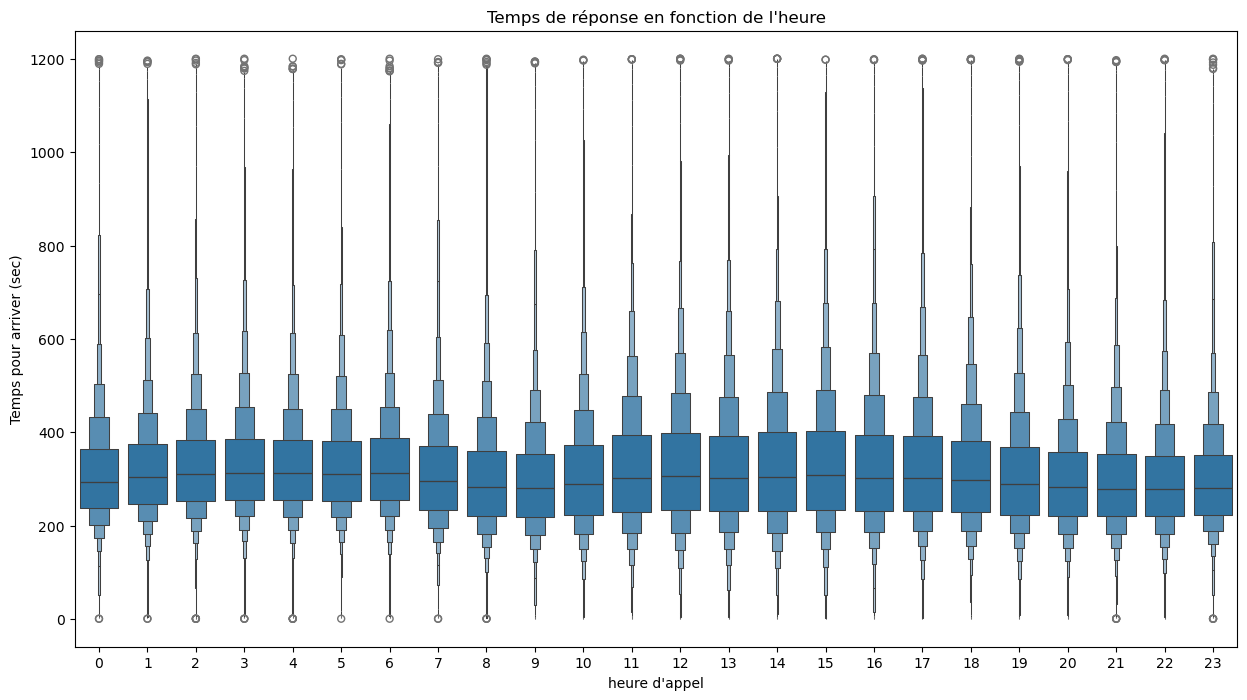

In [11]:
# Box du temps de réponse en focntion de l'heure de l'appel
plt.figure(figsize =(15,8))
sns.boxenplot(y = df.FirstPumpArriving_AttendanceTime , x = "HourOfCall",
            data = df)

plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (sec)")
plt.title("Temps de réponse en fonction de l'heure")
plt.show()

# Rush Hours : Matin : 7-10  Aprem : 17-19

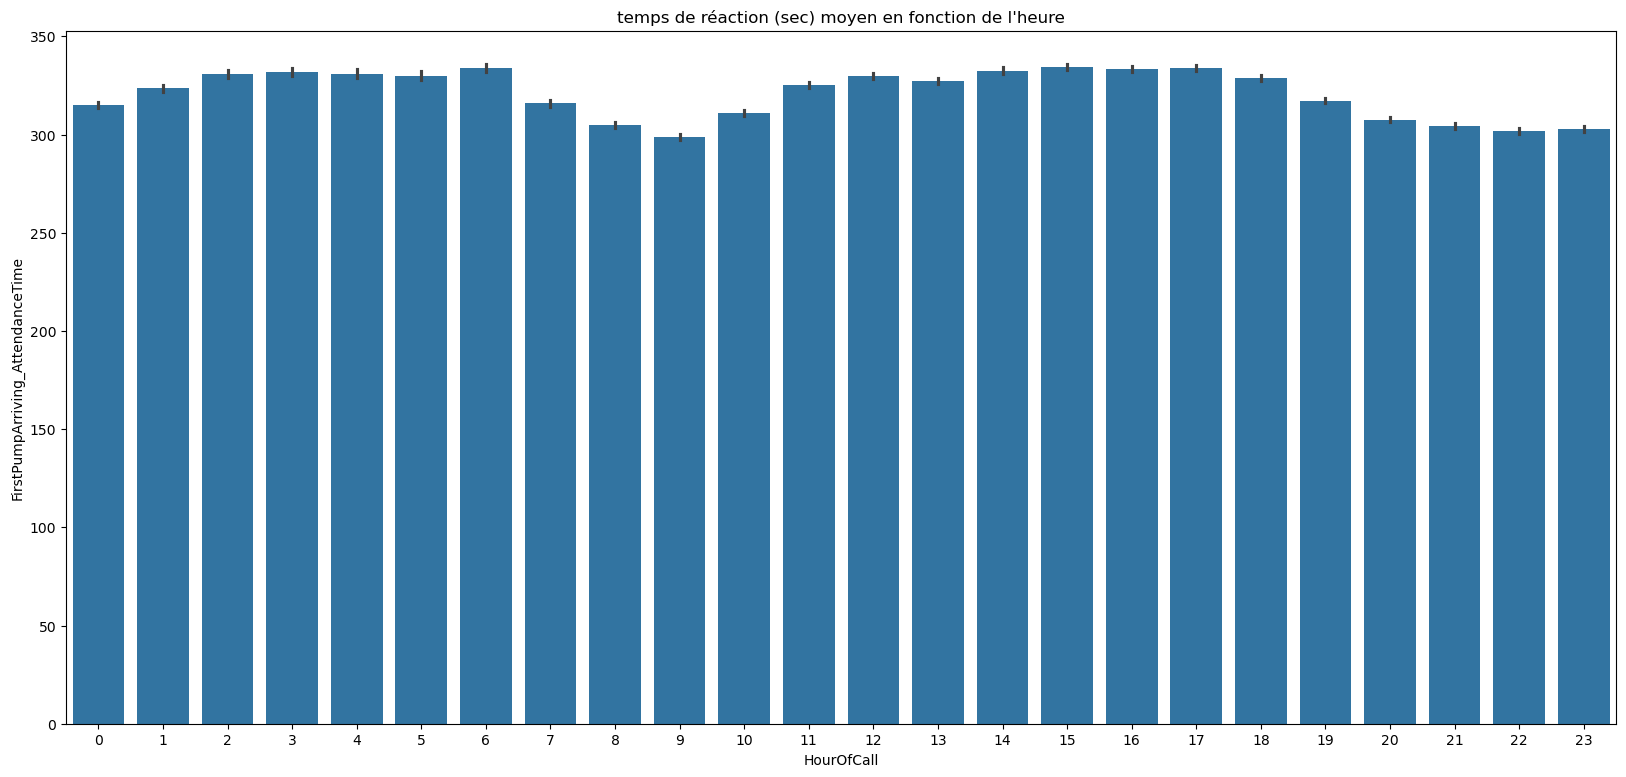

In [34]:
plt.figure(figsize=(20,9))
sns.barplot(y = df.FirstPumpArriving_AttendanceTime , x = "HourOfCall",
            data = df)
plt.title("temps de réaction (sec) moyen en fonction de l'heure")
plt.show()

In [76]:
# stats en fonction de l'heure
df.groupby('HourOfCall')["FirstPumpArriving_AttendanceTime"].agg(['mean','var','std','count'])

,mean,var,std,count
HourOfCall,,,,
0,313.714432,15590.686175,124.862669,48857
1,323.460681,15613.104051,124.952407,39943
2,331.030372,16216.405445,127.343651,32826
3,333.389629,16233.057279,127.409016,28830
4,331.811624,15798.198099,125.690883,25619
5,331.028239,15598.411596,124.893601,24611
6,334.323692,16110.010922,126.925218,28799
7,315.609503,17024.884316,130.479440,40428
8,305.061419,17057.141016,130.602990,54446


Text(0.5, 1.0, "temps de réaction moyen (min) en fonction de l'heure")

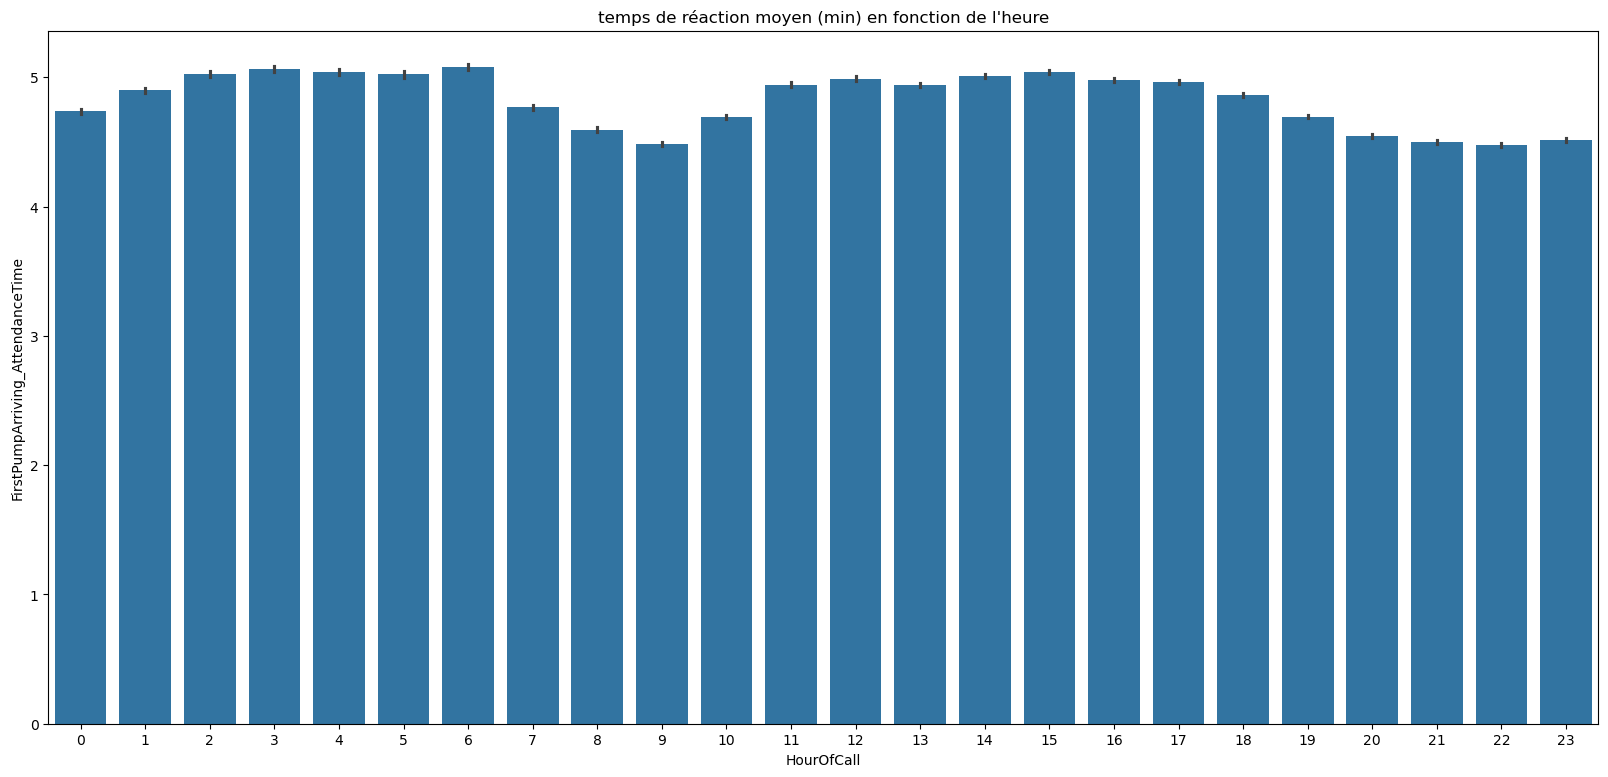

In [33]:
plt.figure(figsize=(20,9))
sns.barplot(y = df.FirstPumpArriving_AttendanceTime//60 , x = "HourOfCall",
            data = df)
plt.title("temps de réaction moyen (min) en fonction de l'heure")
plt.show()

In [ ]:
## test stat sur l'attendance time en fonction de l'heure.

#### Découpage de l'heure

In [77]:
# Découpage du temps en fonction de l'horaire
Periode = pd.cut(df.HourOfCall,bins= [0,6,12,18,24],include_lowest=True,right =False,
                 labels=["Nuit","Matin","Midi","Soir"])

df.insert(df.columns.get_loc("HourOfCall")+1,"Periode",Periode)
pd.set_option('max_colwidth',50)
pd.set_option('display.max_columns',50)
df.head(2)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,Periode,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion,London_Zone
0,235138081,2009-01-01,2009,1900-01-01 00:00:37,0,Nuit,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,WANDSWORTH,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,NaN,NaN,319,NaN,H,253.0,89.0,342.0,NaN,H,Inner London
1,2091,2009-01-01,2009,1900-01-01 00:03:00,0,Nuit,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,ENFIELD,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0,151.0,157.0,308,NaN,A,NaN,NaN,NaN,NaN,NaN,Outer London


In [36]:
# Découpage du temps en fonction des heures de pointes
# Rush Hours : Matin : 7-10  Aprem : 17-19

pd.cut(df.HourOfCall,bins= [0,7,11,17,20,24],include_lowest=True,right =False)


0            [0, 7)
1            [0, 7)
2            [0, 7)
3            [0, 7)
5            [0, 7)
             ...   
1507462    [20, 24)
1507467    [20, 24)
1507470    [20, 24)
1507475    [20, 24)
1507480    [20, 24)
Name: HourOfCall, Length: 787935, dtype: category
Categories (5, interval[int64, left]): [[0, 7) < [7, 11) < [11, 17) < [17, 20) < [20, 24)]

In [78]:
# Découpage du temps en fonction des heures de pointes
# Rush Hours : Matin : 7-10  Aprem : 17-19

Periode_rush = pd.cut(df.HourOfCall,bins= [0,7,11,17,20,24],include_lowest=True,right =False,ordered=False,
       labels=["No rush","Morning rush","No rush","Afternoon rush","No rush"])


df.insert(df.columns.get_loc("HourOfCall")+2,"Periode_Rush",Periode_rush)

df.head(2)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,Periode,Periode_Rush,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion,London_Zone
0,235138081,2009-01-01,2009,1900-01-01 00:00:37,0,Nuit,No rush,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,WANDSWORTH,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,NaN,NaN,319,NaN,H,253.0,89.0,342.0,NaN,H,Inner London
1,2091,2009-01-01,2009,1900-01-01 00:03:00,0,Nuit,No rush,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,ENFIELD,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0,151.0,157.0,308,NaN,A,NaN,NaN,NaN,NaN,NaN,Outer London


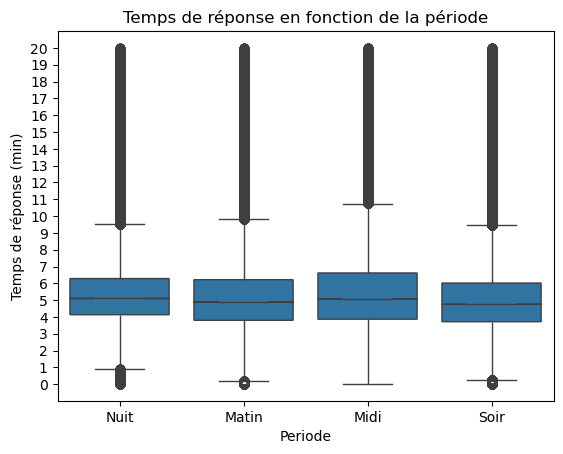

In [33]:
sns.boxplot(y = df["FirstPumpArriving_AttendanceTime"] , x= "Periode",data = df, notch=True)

plt.yticks(ticks = range(0,1260,60),labels= range(0,21))
plt.ylabel("Temps de réponse (min)")
plt.title("Temps de réponse en fonction de la période")
plt.show()

In [38]:
df.groupby('Periode')['FirstPumpArriving_AttendanceTime'].agg(['mean','std',"var"])
# plus rapide le matin (6-11) et le soir (18-23)

/var/folders/h7/s4gght1j63df7l8xt_syhm5c0000gn/T/ipykernel_38345/3901946958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Periode')['FirstPumpArriving_AttendanceTime'].agg(['mean','std',"var"])


,mean,std,var
Periode,,,
Nuit,325.717291,134.283059,18031.939839
Matin,313.254024,141.510780,20025.300917
Midi,331.958206,161.192008,25982.863288
Soir,311.724791,145.224919,21090.277228


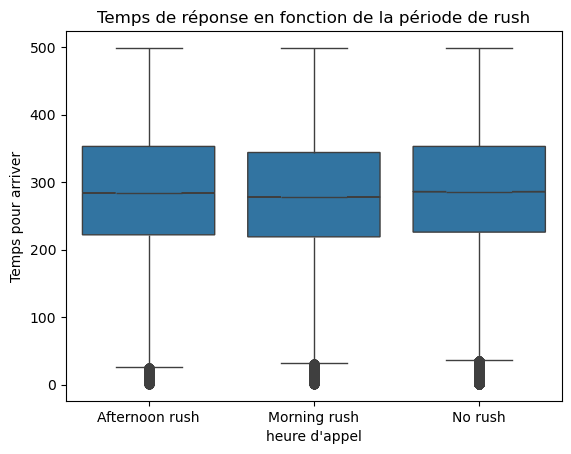

In [73]:
sns.boxplot(y = df["FirstPumpArriving_AttendanceTime"] , x= "Periode_Rush",data = df, notch=True)

plt.xlabel("moment d'appel")
plt.ylabel("Temps de réponse")
plt.title("Temps de réponse en fonction de la période de rush")
plt.show()

<AxesSubplot:xlabel='FirstPumpArriving_AttendanceTime', ylabel='Periode_Rush'>

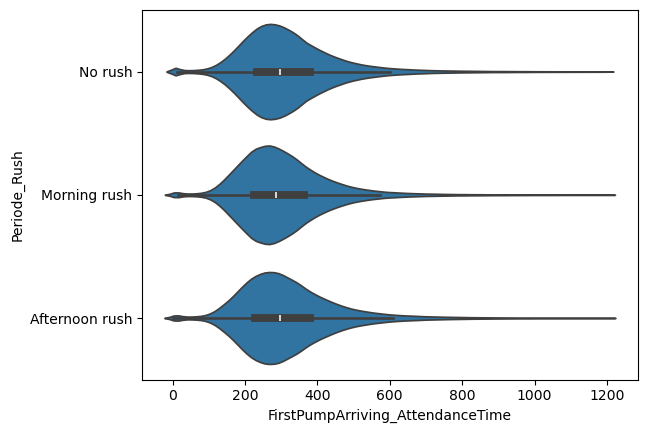

In [6]:
sns.violinplot(x = 'FirstPumpArriving_AttendanceTime' ,y = 'Periode_Rush', data = df )

In [39]:
df.groupby('Periode_Rush')['FirstPumpArriving_AttendanceTime'].agg(['mean','std'])

/var/folders/h7/s4gght1j63df7l8xt_syhm5c0000gn/T/ipykernel_38345/1459482641.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Periode_Rush')['FirstPumpArriving_AttendanceTime'].agg(['mean','std'])


,mean,std
Periode_Rush,,
Afternoon rush,326.682103,155.301903
Morning rush,306.930879,137.652188
No rush,322.596712,149.548070


#### Confinement covid 

In [80]:
# Définir si un incident a lieu pendant un confinement
# dates de Lockdowns Covid
# 1st : 26 Mars 2020 - 23 Juin 2020  2nd :5 Novembre 2020-2decembre  3rd: 6 Janvier 2021- 19 Juillet 2021

# Met du temps à tourner

from tqdm import tqdm

# "2020-03-26" "2020-06-23"   "2020-11-05" "2020-12-02"   "2021-01-06" "2021-08-19"
Covid_Lockdown = []

# pour chaque date
for date in tqdm(df["DateOfCall"]) :
    # si l'année est comprise entre 2020 et 2021 on check la date conrrespond à une période confinement
    if (2020 <= date.year <=2021) :
        if pd.to_datetime("2020-03-26") <= date <= pd.to_datetime("2020-06-23") or pd.to_datetime("2020-11-05" ) <= date <= pd.to_datetime("2020-12-02") or pd.to_datetime("2021-01-06" ) <= date <= pd.to_datetime("2021-08-19"):
            Covid_Lockdown.append(1)
        else :
            Covid_Lockdown.append(0)
    else : 
        Covid_Lockdown.append(0)

df["Covid_Lockdown"] = Covid_Lockdown


100%|██████████| 1507482/1507482 [08:32<00:00, 2943.88it/s]  


In [297]:
df.groupby("Covid_Lockdown")["FirstPumpArriving_AttendanceTime"].agg(["mean","median","std","var"])


,mean,median,std,var
Covid_Lockdown,,,,
0,321.346923,296.0,149.220488,22266.753953
1,307.285581,288.0,138.995887,19319.856587


In [27]:
df.Covid_Lockdown.value_counts()

Covid_Lockdown
0    748244
1     39691
Name: count, dtype: int64

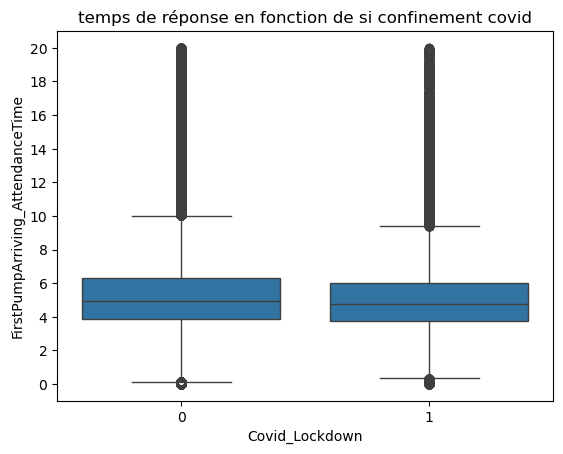

In [19]:
# boxplot temps de réponse en focntion de la présenc de cause de retard
sns.boxplot(y =df.FirstPumpArriving_AttendanceTime,x = df.Covid_Lockdown)
plt.yticks(range(0,1300,120), labels=list(range(0,22,2)))
plt.title("temps de réponse en fonction de si confinement covid")
plt.show() 

#### Presence/absence de retard

In [17]:
# 0-1 Si il y a une cause de retard

FirstPump_Delayed = []
SecondPump_Delayed = []

df["FirstPump_Delayed"] = np.where(df["FirstPump_DelayCode_Description"].isna(), 0,1)
df["SecondPump_Delayed"] = np.where(df["SecondPump_DelayCode_Description"].isna(), 0,1)


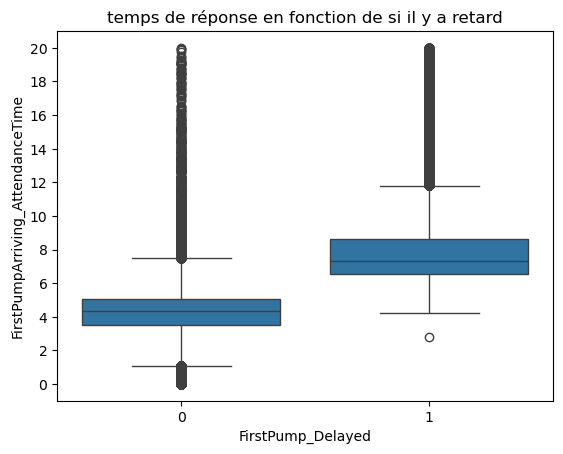

In [18]:
# boxplot temps de réponse en focntion de la présenc de cause de retard
sns.boxplot(y =df.FirstPumpArriving_AttendanceTime,x = df.FirstPump_Delayed)
plt.yticks(range(0,1300,120), labels=list(range(0,22,2)))
plt.title("temps de réponse en fonction de si il y a retard")
plt.show() 

In [19]:
df.groupby("FirstPump_Delayed")["FirstPumpArriving_AttendanceTime"].agg(["mean","median","std","var"])


,mean,median,std,var
FirstPump_Delayed,,,,
0,252.104656,259.0,70.831896,5017.157473
1,481.182730,438.0,131.948872,17410.504717


In [21]:
481/60

8.016666666666667

In [30]:
df.FirstPump_DelayCode_Description.value_counts(dropna=False)

FirstPump_DelayCode_Description
NaN                                   553177
Not held up                           131210
Traffic, roadworks, etc                47189
Address incomplete/wrong               22413
Traffic calming measures               13009
Arrived but held up - Other reason      8148
Mob/Radio problems when mobilised       4013
On outside duty when mobilised          3971
Weather conditions                      2453
At drills when mobilised                1194
Appliance/Equipment defect              1158
Name: count, dtype: int64

In [41]:
# temps de réponse en fonction du type de retard
df.groupby("FirstPump_DelayCode_Description",dropna=False)["FirstPumpArriving_AttendanceTime"].agg(["mean","var","min","max",'count'])


,mean,var,min,max,count
FirstPump_DelayCode_Description,,,,,
Address incomplete/wrong,563.613723,36406.574159,360.0,1200.0,27822
Appliance/Equipment defect,496.514851,23852.179653,360.0,1200.0,2222
Arrived but held up - Other reason,525.841592,25585.256274,360.0,1200.0,14267
At drills when mobilised,474.130824,14013.875302,360.0,1192.0,2232
Mob/Radio problems when mobilised,491.485985,23158.267725,360.0,1197.0,7492
Not held up,470.480907,14540.419039,168.0,1200.0,254496
On outside duty when mobilised,497.187235,17273.042221,360.0,1192.0,7066
Traffic calming measures,466.349038,13296.842518,292.0,1200.0,27126
"Traffic, roadworks, etc",479.568157,15798.164242,360.0,1200.0,84547


In [78]:
pompe_1 = np.array(df[df["FirstPump_DelayCode_Description"].isnull()]["FirstPumpArriving_AttendanceTime"])
pompe_1_retard = np.array(df[df["FirstPump_DelayCode_Description"].isnull() == False]["FirstPumpArriving_AttendanceTime"])

pompe_2 = np.array(df[df["SecondPump_DelayCode_Description"].isnull()]["SecondPumpArriving_AttendanceTime"])
pompe_2_retard = np.array(df[df["SecondPump_DelayCode_Description"].isnull() == False]["SecondPumpArriving_AttendanceTime"])

data = [pompe_1,pompe_1_retard,pompe_2,pompe_2_retard]


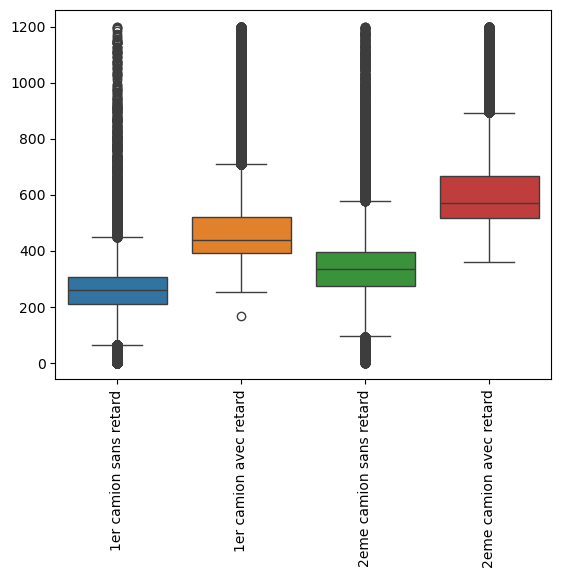

In [79]:
sns.boxplot(data)
plt.xticks(ticks = range(0,4),labels =["1er camion sans retard","1er camion avec retard","2eme camion sans retard","2eme camion avec retard"],rotation = 90)
plt.show()


In [34]:
#pour la premiere pompe : stat si retard ou pas
display(df.groupby("FirstPump_Delayed")["FirstPumpArriving_AttendanceTime"].agg(["mean","var","min","max",'count']))

print(df.FirstPumpArriving_AttendanceTime.mean())


,mean,var,min,max,count
FirstPump_Delayed,,,,,
0,248.248631,5457.648327,1.0,1200.0,553177
1,491.216257,19963.838510,168.0,1200.0,234758


320.6386047072411


In [ ]:
# Isoler la cause de "retard Traffic, roadworks, etc" et regarde les heures d'apparition

In [81]:
df.FirstPump_DelayCode_Description.unique()

array([nan, 'Not held up', 'Address incomplete/wrong',
       'Traffic, roadworks, etc', 'Traffic calming measures',
       'Arrived but held up - Other reason', 'Appliance/Equipment defect',
       'Mob/Radio problems when mobilised',
       'On outside duty when mobilised', 'Weather conditions',
       'At drills when mobilised'], dtype=object)

In [12]:
Retard_traffic = df[df.FirstPump_DelayCode_Description == "Traffic, roadworks, etc"]

In [88]:
Retard_traffic.HourOfCall.value_counts(normalize=True)

HourOfCall
17    0.081611
16    0.077968
15    0.076455
18    0.076253
13    0.072126
12    0.071026
14    0.070647
11    0.065029
19    0.058133
10    0.054644
9     0.043526
8     0.040995
20    0.037494
21    0.029628
7     0.026506
22    0.022603
23    0.018368
0     0.015589
6     0.013827
1     0.012857
2     0.010692
3     0.009285
5     0.007617
4     0.007120
Name: proportion, dtype: float64

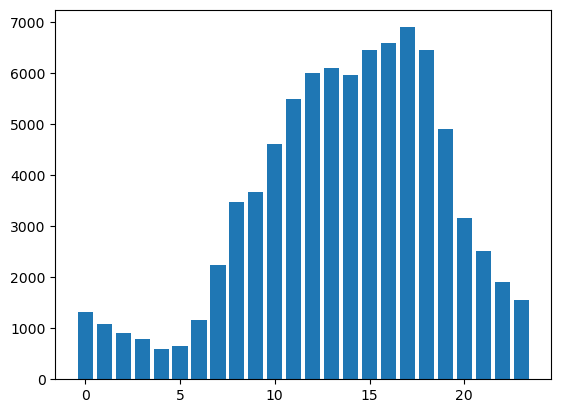

In [45]:
plt.bar(x=(Retard_traffic.HourOfCall).value_counts().index,
        height=(Retard_traffic.HourOfCall).value_counts())
plt.show()

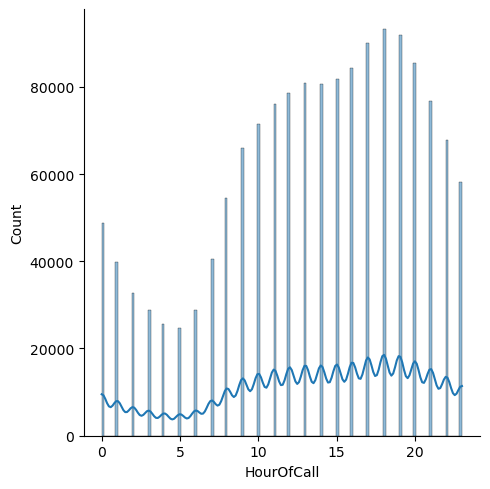

In [89]:
sns.displot(df['HourOfCall'], kde = True);

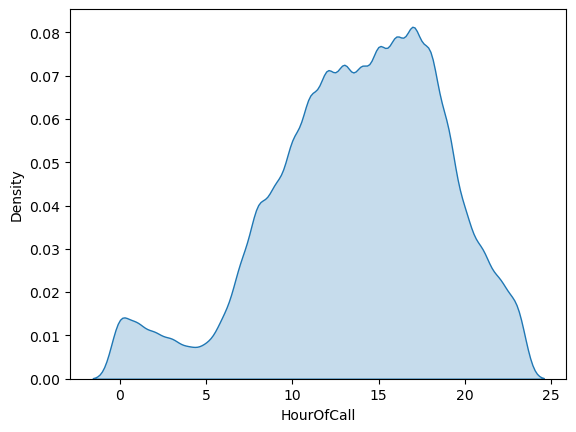

In [98]:
sns.kdeplot(Retard_traffic['HourOfCall'],fill=True);

In [44]:
df.Periode_Rush.value_counts(normalize=True)

Periode_Rush
No rush           0.656769
Afternoon rush    0.173098
Morning rush      0.170133
Name: proportion, dtype: float64

In [45]:
Retard_traffic.Periode_Rush.value_counts(normalize=True)

Periode_Rush
No rush           0.612304
Afternoon rush    0.202102
Morning rush      0.185594
Name: proportion, dtype: float64

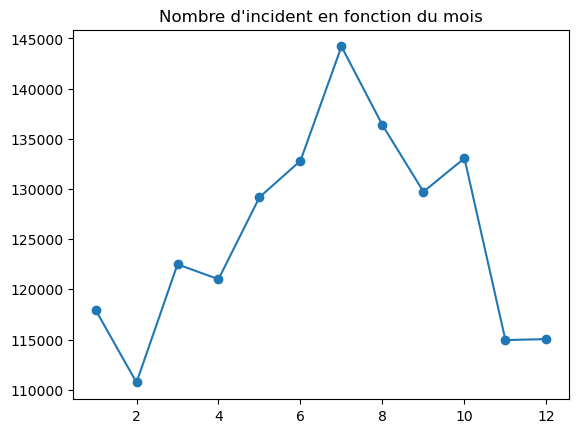

In [105]:
# Vue précedemment que pic d'incident en Juin avec une "parabole"
plt.plot(df.DateOfCall.dt.month.value_counts().sort_index().index,df.DateOfCall.dt.month.value_counts().sort_index(),'-o')
plt.title("Nombre d'incident en fonction du mois");

<BarContainer object of 12 artists>

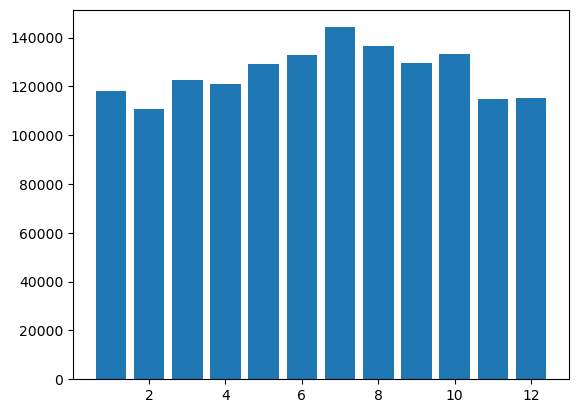

In [104]:
# nombre d'incident en fonction du mois : pic en juin
plt.bar(df.DateOfCall.dt.month.value_counts().sort_index().index,df.DateOfCall.dt.month.value_counts().sort_index())


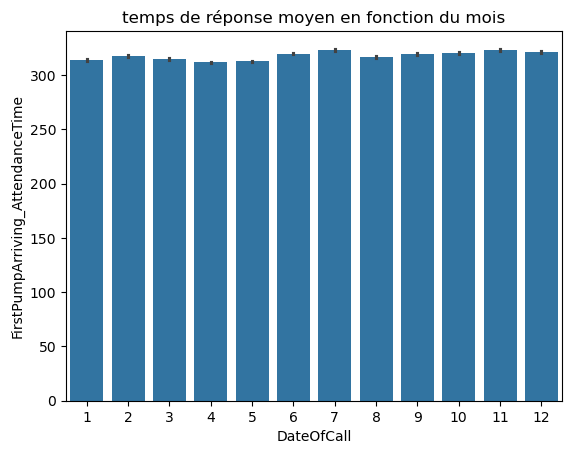

In [121]:
# plot du temps de réponse moyen en fonction du mois
sns.barplot(y ="FirstPumpArriving_AttendanceTime", x = df.DateOfCall.dt.month, data =df )
plt.title("temps de réponse moyen en fonction du mois")
plt.show()

In [46]:
# stat du temps de réponse en fonction du mois : leger plus lent en juin et de oct-dec
display(df.groupby(df.DateOfCall.dt.month)["FirstPumpArriving_AttendanceTime"].agg(['mean',"median",'var','std']))


,mean,var,std
DateOfCall,,,
1,313.831371,19724.110162,140.442551
2,318.203850,21024.233704,144.997358
3,316.640073,20958.871466,144.771791
4,315.960437,21275.374284,145.860804
5,316.937359,21420.251544,146.356590
6,323.120166,23412.341416,153.010919
7,328.408490,24240.673327,155.694166
8,320.598475,22610.612535,150.368256
9,322.243964,22288.465710,149.293221


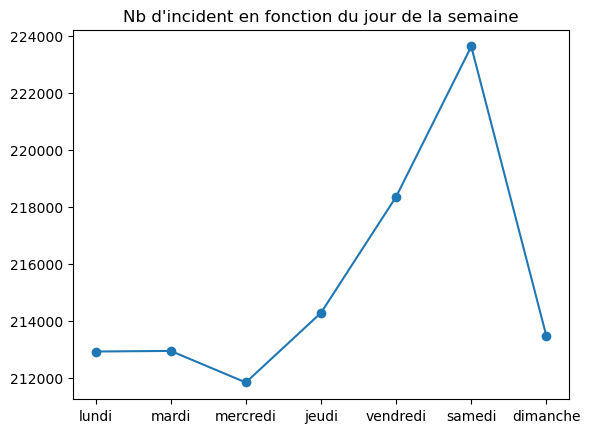

In [123]:
# nombre d'incident en fonction du jour de la semaine
plt.plot(df.DateOfCall.dt.weekday.value_counts().sort_index().index,df.DateOfCall.dt.weekday.value_counts().sort_index(),'-o')
plt.title("Nb d'incident en fonction du jour de la semaine")
plt.xticks(range(0,7),["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"])
plt.show()
# plus d'incident enregistré le weekend


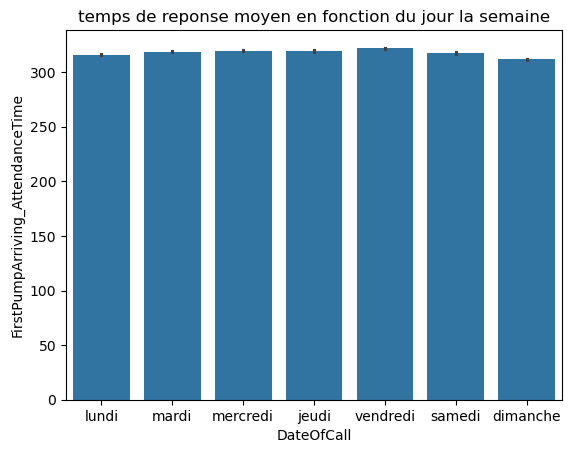

In [124]:
# plot du temps de réponse moyen en fonction du jour
sns.barplot(y ="FirstPumpArriving_AttendanceTime", x = df.DateOfCall.dt.weekday, data =df )
plt.xticks(range(0,7),["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"])
plt.title("temps de reponse moyen en fonction du jour la semaine")
plt.show()

In [125]:
# stat du temps de réponse en fonction du mois
df.groupby(df.DateOfCall.dt.weekday)['FirstPumpArriving_AttendanceTime'].agg(['mean',"median",'var','std'])

,mean,var,std
DateOfCall,,,
0,316.149526,19279.270510,138.849813
1,318.886741,19346.752144,139.092603
2,319.707322,19473.055975,139.545892
3,319.306587,19420.001100,139.355664
4,321.743163,19895.694809,141.052100
5,317.547565,19483.113610,139.581924
6,311.836272,18252.344943,135.101240


#### Ajout de mois et weekday

In [83]:
# Encoding du jour et du mois de l'incident :  mean encoding ou pas d'encoding puisque deja numérique ?

Mois = df.DateOfCall.dt.month
df.insert(df.columns.get_loc("DateOfCall")+1,"Month",Mois)

Weekday = df.DateOfCall.dt.weekday
df.insert(df.columns.get_loc("DateOfCall")+2,'Weekday',Weekday)

df.head()

# diff de semaine-weekend plus tard

,IncidentNumber,DateOfCall,Month,Weekday,CalYear,TimeOfCall,HourOfCall,Periode,Periode_Rush,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion,London_Zone,Covid_Lockdown,FirstPump_Delayed,SecondPump_Delayed
0,235138081,2009-01-01,1,3,2009,1900-01-01 00:00:37,0,Nuit,No rush,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,WANDSWORTH,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0,NaN,NaN,319,NaN,H,253.0,89.0,342.0,NaN,H,Inner London,0,0,0
1,2091,2009-01-01,1,3,2009,1900-01-01 00:03:00,0,Nuit,No rush,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,ENFIELD,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0,151.0,157.0,308,NaN,A,NaN,NaN,NaN,NaN,NaN,Outer London,0,0,0
2,3091,2009-01-01,1,3,2009,1900-01-01 00:04:27,0,Nuit,No rush,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,HILLINGDON,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0,108.0,102.0,210,NaN,G,NaN,NaN,NaN,NaN,NaN,Outer London,0,0,0
3,5091,2009-01-01,1,3,2009,1900-01-01 00:05:39,0,Nuit,No rush,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,ISLINGTON,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0,114.0,119.0,233,NaN,A,142.0,108.0,250.0,NaN,A,Inner London,0,0,0
4,6091,2009-01-01,1,3,2009,1900-01-01 00:06:03,0,Nuit,No rush,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW5,CAMDEN,Kentish Town North,NaN,NaN,529450,185250,NaN,NaN,Kentish Town,172.0,Kentish Town,222.0,Kentish Town,1.0,2.0,2,60,255,1.0,83.0,89.0,172,NaN,A,95.0,127.0,222.0,NaN,A,Inner London,0,0,0


In [84]:
# Jour de la semaine allanr de 1 à 7 au lieu de 0-6

df['Weekday'] = df['Weekday'].replace({0:1,1:2,2:3,3:4,4:5,5:6,6:7})
df.Weekday.value_counts()

Weekday
6    223630
5    218360
4    214288
7    213470
2    212954
1    212933
3    211847
Name: count, dtype: int64

In [15]:
df.groupby(["Weekday","FirstPump_Delayed"])['FirstPumpArriving_AttendanceTime'].agg(['mean',"count"])



mean  count
Weekday FirstPump_Delayed                   
1       0                  247.345987  80396
        1                  490.817824  33034
2       0                  248.843814  79911
        1                  490.916698  34369
3       0                  248.436349  79480
        1                  491.240144  34725
4       0                  248.992318  80321
        1                  491.059444  34587
5       0                  248.812062  80117
        1                  492.281087  35964
6       0                  247.718429  78307
        1                  493.312156  32724
7       0                  247.535012  74645
        1                  488.530847  29355

In [32]:
df.Weekday

0          4
1          4
2          4
3          4
5          4
          ..
1507462    2
1507467    2
1507470    2
1507475    2
1507480    2
Name: Weekday, Length: 787935, dtype: int32

In [85]:
df["Week_Weekend"] = df.Weekday.replace({1 : "Week", 2 : "Week", 3: "Week", 4 : "Week", 5 : "Week", 
                   6: "Weekend", 7 : "Weekend"} )

In [29]:
pd.set_option("display.max_rows",70)
df.groupby(["Weekday","FirstPump_Delayed"])["FirstPump_DelayCode_Description"].value_counts(normalize = True)

Weekday  FirstPump_Delayed  FirstPump_DelayCode_Description   
1        1                  Not held up                           0.563208
                            Traffic, roadworks, etc               0.192408
                            Address incomplete/wrong              0.095810
                            Traffic calming measures              0.056881
                            Arrived but held up - Other reason    0.032966
                            Mob/Radio problems when mobilised     0.018496
                            On outside duty when mobilised        0.017497
                            Weather conditions                    0.012623
                            At drills when mobilised              0.005600
                            Appliance/Equipment defect            0.004511
2        1                  Not held up                           0.554366
                            Traffic, roadworks, etc               0.213332
                            Address i

In [46]:
# fréquence des raisons de retard en fonction si on est en semaine ou en WE
df.groupby(["Week_Weekend","FirstPump_Delayed"])["FirstPump_DelayCode_Description"].value_counts(normalize = True)

Week_Weekend  FirstPump_Delayed  FirstPump_DelayCode_Description   
Week          1                  Not held up                           0.551937
                                 Traffic, roadworks, etc               0.213465
                                 Address incomplete/wrong              0.090827
                                 Traffic calming measures              0.054442
                                 Arrived but held up - Other reason    0.034000
                                 On outside duty when mobilised        0.017912
                                 Mob/Radio problems when mobilised     0.016904
                                 Weather conditions                    0.010134
                                 At drills when mobilised              0.005594
                                 Appliance/Equipment defect            0.004783
Weekend       1                  Not held up                           0.578328
                                 Traffic, roadworks,

In [ ]:
# Quelles varaibles connues à priori conservées pour prédire le temps de réponse
# heure de l'appel : rien ou mean encoding
# mois et jour de l'appel
# zone de londre : label
# dst caserne - incident
# quartier : mean encoding
# type de feu : mean encoding


#### Ajout des coordonnées des casernes

In [94]:
coor_caserne = pd.read_csv('Data/Adresse_station.csv')
coor_caserne.head()

,Quartier,Nom_station,Adresse,latitude_corrigée,longitude_corrigée
0,Barking and Dagenham,Barking,"Alfred's Way, IG11 0BB",51.529808,0.088927
1,Barking and Dagenham,Dagenham,"70 Rainham Road North, Dagenham, RM10 7ES",51.559509,0.156807
2,The City of London,Dowgate,"94-95 Upper Thames Street, EC4R 3UE",51.510415,-0.089807
3,Hackney,Shoreditch,"235 Old Street, EC1V 9EY",51.526471,-0.085432
4,Hackney,Stoke Newington,"64 Stoke Newington Church Street, N16 0AR",51.562023,-0.076535


In [95]:
coor_caserne = coor_caserne.rename(columns = {"latitude_corrigée" : "Latitude",
                    "longitude_corrigée": "Longitude"})
coor_caserne.head()

In [50]:
# nombre de nom de station apparaissant dans le DataFrame : 117 
# Aujourd'hui il y a 102 stations. (Suppression à partir d'une certaines année 2014 notamment)
len(sorted(np.char.title(df.FirstPumpArriving_DeployedFromStation.unique().astype(str))))


116

Stations fermées de 1993 : source https://en.wikipedia.org/wiki/London_Fire_Brigade#Stations_and_equipment

2014: Belsize, Bow, Clerkenwell, Downham, Kingsland, Knightsbridge, Silvertown, Southwark, Westminster, and Woolwich.  
2005: Manchester Square  
1999: Barbican  
1998: Heathrow Airport (new station subsequently opened when the central terminal area was re-classified as "A" risk)  
1998: Shooter's Hill  
1993: Sanderstead (originally a Surrey Fire Brigade station)

In [51]:
coor_caserne.Nom_station.value_counts()

Nom_station
Barking        1
Purley         1
New Cross      1
Lewisham       1
Forest Hill    1
              ..
Park Royal     1
Mill Hill      1
Hendon         1
Finchley       1
Soho           1
Name: count, Length: 103, dtype: int64

In [52]:
#liste stations fermées depuis 2005 : 10 total
Station_fermee = ["Belsize", "Bow", "Clerkenwell", "Downham", "Kingsland", "Knightsbridge", "Silvertown", "Southwark", "Westminster", "Woolwich"]
print(sorted(Station_fermee),"\n",len(Station_fermee))


['Belsize', 'Bow', 'Clerkenwell', 'Downham', 'Kingsland', 'Knightsbridge', 'Silvertown', 'Southwark', 'Westminster', 'Woolwich'] 
 10


In [53]:
print("Stations du dataFrame qui ne sont pas dans la liste des coordonées\n")
print(sorted(set(df.FirstPumpArriving_DeployedFromStation.unique())-set(coor_caserne.Nom_station.unique())))
print("\n",len(set(df.FirstPumpArriving_DeployedFromStation.unique())-set(coor_caserne.Nom_station.unique())))

Stations du dataFrame qui ne sont pas dans la liste des coordonées

['Belsize', 'Bow', 'Buckinghamshire', 'Clerkenwell', 'Dartford', 'Downham', 'Hertfordshire', 'Kingsland', 'Knightsbridge', 'Silvertown', 'Southwark', 'Staines', 'Westminster', 'Woolwich']

 14


In [54]:
# station du df qui sont absentes du le tab des coordonées
diff_df_coord =set(df.FirstPumpArriving_DeployedFromStation.unique())-set(coor_caserne.Nom_station.unique())
diff_df_coord

{'Belsize',
 'Bow',
 'Buckinghamshire',
 'Clerkenwell',
 'Dartford',
 'Downham',
 'Hertfordshire',
 'Kingsland',
 'Knightsbridge',
 'Silvertown',
 'Southwark',
 'Staines',
 'Westminster',
 'Woolwich'}

In [55]:
print("Station de la liste des coordonnées qui ne sont pas dans la liste dans le dataframe")

set(coor_caserne.Nom_station.unique())-set(df.FirstPumpArriving_DeployedFromStation.unique())

Station de la liste des coordonnées qui ne sont pas dans la liste dans le dataframe


{'Lambeth River'}

In [62]:
print("Station de la liste des coordonnées qui ne sont pas dans la liste dans le dataframe")

set(coor_caserne.Nom_station.unique())-set(df.FirstPumpArriving_DeployedFromStation.unique())

Station de la liste des coordonnées qui ne sont pas dans la liste dans le dataframe


{'Lambeth River'}

In [97]:
from tqdm import tqdm
latitude = []
longitude = []

# boucle qui parcours les staitons de deploiement
for caserne_depart in tqdm(df.FirstPumpArriving_DeployedFromStation) : 
    # si le nom est dans la liste des coordonnées des casernes, 
    if caserne_depart in coor_caserne.Nom_station.unique():
        # recupere les coordonnées, arrondi pour avoir des coordonnées cohérentes
        latitude.append(coor_caserne.Latitude[coor_caserne.Nom_station == caserne_depart].values[0].astype('float').round(6))
        longitude.append(coor_caserne.Longitude[coor_caserne.Nom_station == caserne_depart].values[0].astype('float').round(6))
    else :
        longitude.append(np.nan)
        latitude.append(np.nan)
        
# plutot methode map...

100%|██████████| 1507482/1507482 [15:25<00:00, 1628.04it/s]


In [99]:
df.insert(df.columns.get_loc("FirstPumpArriving_DeployedFromStation")+1,"Latitude_Station",latitude)
df.insert(df.columns.get_loc("FirstPumpArriving_DeployedFromStation")+2,"Longitude_Station",longitude)


In [100]:
df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
Month                                           0
Weekday                                         0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
Periode                                         0
Periode_Rush                                    0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1083930
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              719547
Postcode_district                               0
IncGeo_BoroughName                              0
IncGeo_WardNameNew                            151
Easting_m                                  719547


In [102]:
# Supprime les lignes ou il n'y a pas de coordonnées pour les stations
df = df.dropna(subset = ["Latitude_Station"], how = "any", axis = 0)

In [103]:
df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
Month                                           0
Weekday                                         0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
Periode                                         0
Periode_Rush                                    0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1051772
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              702739
Postcode_district                               0
IncGeo_BoroughName                              0
IncGeo_WardNameNew                            151
Easting_m                                  702739


In [104]:
df[["Latitude","Longitude"]].describe().round()
# certaines latitude sont nulles ==> calcul à partir des eastiong et northing avec convertbng


,Latitude,Longitude
count,761941.0,761941.0
mean,51.0,-0.0
std,2.0,0.0
min,0.0,-1.0
25%,51.0,-0.0
50%,52.0,-0.0
75%,52.0,-0.0
max,52.0,0.0


### Calcul de coordonnées d'incident pour les lignes où on a des zeros en lat/long


In [22]:
pip install convertbng

   ---------------------------------------- 0.0/13.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/13.5 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/13.5 MB 13.3 MB/s eta 0:00:01
   --- ------------------------------------ 1.0/13.5 MB 13.3 MB/s eta 0:00:01
   ----- ---------------------------------- 1.8/13.5 MB 10.4 MB/s eta 0:00:02
   ------ --------------------------------- 2.1/13.5 MB 12.1 MB/s eta 0:00:01
   -------- ------------------------------- 3.0/13.5 MB 11.3 MB/s eta 0:00:01
   --------- ------------------------------ 3.1/13.5 MB 11.8 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.5 MB 11.6 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.5 MB 11.6 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.5 MB 11.6 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.5 MB 11.6 MB/s eta 0:00:01
   --------------- ------------------------ 5.2/13.5 MB 9.9 MB/s eta 0:00

In [23]:
from convertbng.util import convert_bng, convert_lonlat


In [24]:
df.iloc[5][["Latitude","Longitude","Easting_m","Northing_m"]]

Latitude      51.462211
Longitude      0.029557
Easting_m      541086.0
Northing_m     175646.0
Name: 5, dtype: object

In [134]:
# convert lists of BNG Eastings and Northings to longitude, latitude
convert_lonlat(541086.0,175646.0)

([0.02955719], [51.46221072])

In [27]:
df[df.Latitude == 0].index

Index([ 929125,  929158,  937479,  952119,  952398,  967012,  970360,  972094,
        977900,  989350,
       ...
       1503796, 1504599, 1504948, 1505247, 1505523, 1505925, 1506059, 1506104,
       1507172, 1507283],
      dtype='int64', length=766)

In [34]:
df.loc[929158][["Latitude","Longitude","Easting_m","Northing_m","Latitude_Station","Longitude_Station"]]

Latitude                   0.0
Longitude                  0.0
Easting_m             528987.0
Northing_m            182237.0
Latitude_Station     51.527725
Longitude_Station    -0.130642
Name: 929158, dtype: object

In [132]:
convert_lonlat(528987.0,182237.0)

([-0.14209789], [51.52432776])

In [130]:
round(convert_lonlat(528987.0,182237.0)[1][0],6)

51.524328

In [137]:
df[df.Latitude == 0].index


Index([ 929125,  929158,  937479,  952119,  952398,  967012,  970360,  972094,
        977900,  989350,
       ...
       1503796, 1504599, 1504948, 1505247, 1505523, 1505925, 1506059, 1506104,
       1507172, 1507283],
      dtype='int64', length=766)

In [138]:
# Pour les index où les coordonnées sont nulles on calcul les coordonnées à partir des eastings/northing
for i in tqdm(df[df.Latitude == 0].index) : 
    # pour les lignes où les coordonnées d'incident sont nulles on recalcul les coordonnées
    east = df.loc[i,"Easting_m"]
    north = df.loc[i,"Northing_m"]
    df.loc[i,"Longitude"] = round(convert_lonlat(east,north)[0][0],6)
    df.loc[i,"Latitude"] = round(convert_lonlat(east,north)[1][0],6)


100%|██████████| 766/766 [00:01<00:00, 710.25it/s]


In [140]:
df[["Latitude","Longitude"]].describe().round()


,Latitude,Longitude
count,761941.0,761941.0
mean,52.0,-0.0
std,0.0,0.0
min,51.0,-1.0
25%,51.0,-0.0
50%,52.0,-0.0
75%,52.0,-0.0
max,52.0,0.0


### Calcul de coordonnées d'incident pour les lignes où on a des NA en lat/long easting/northing. On utilise easting/northong rounded


In [139]:
df[df.PropertyCategory == "Dwelling"].isna().sum()

IncidentNumber                                 0
DateOfCall                                     0
Month                                          0
Weekday                                        0
CalYear                                        0
TimeOfCall                                     0
HourOfCall                                     0
Periode                                        0
Periode_Rush                                   0
IncidentGroup                                  0
StopCodeDescription                            0
SpecialServiceType                        431254
PropertyCategory                               0
PropertyType                                   0
AddressQualifier                               0
Postcode_full                             695568
Postcode_district                              0
IncGeo_BoroughName                             0
IncGeo_WardNameNew                            77
Easting_m                                 695568
Northing_m          

In [152]:
# partout où il y a dwelling, les coordonnées sont manquantes
# coordonneés obtenues moins précises avec les easting rounded

for i in tqdm(df[df.PropertyCategory == "Dwelling"].index): 
    # pour les lignes où les coordonnées d'incident sont nulles on recalcul les coordonnées
    east = df.loc[i,"Easting_rounded"].astype("float")
    north = df.loc[i,"Northing_rounded"].astype("float")
    df.loc[i,"Longitude"] = round(convert_lonlat(east,north)[0][0],6)
    df.loc[i,"Latitude"] = round(convert_lonlat(east,north)[1][0],6)


100%|██████████| 695568/695568 [07:57<00:00, 1456.93it/s] 


In [153]:
df[df.PropertyCategory == "Dwelling"].isna().sum()

IncidentNumber                                 0
DateOfCall                                     0
Month                                          0
Weekday                                        0
CalYear                                        0
TimeOfCall                                     0
HourOfCall                                     0
Periode                                        0
Periode_Rush                                   0
IncidentGroup                                  0
StopCodeDescription                            0
SpecialServiceType                        431254
PropertyCategory                               0
PropertyType                                   0
AddressQualifier                               0
Postcode_full                             695568
Postcode_district                              0
IncGeo_BoroughName                             0
IncGeo_WardNameNew                            77
Easting_m                                 695568
Northing_m          

In [154]:
df[df.PropertyCategory == "Dwelling"]

,IncidentNumber,DateOfCall,Month,Weekday,CalYear,TimeOfCall,HourOfCall,Periode,Periode_Rush,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,...,Latitude_Station,Longitude_Station,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion,London_Zone,Covid_Lockdown,FirstPump_Delayed,SecondPump_Delayed,Week_Weekend
4,6091,2009-01-01,1,4,2009,1900-01-01 00:06:03,0,Nuit,No rush,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,NW5,CAMDEN,Kentish Town North,NaN,NaN,529450,185250,51.551299,-0.134320,...,51.552703,-0.141720,222.0,Kentish Town,1.0,2.0,2,60,255,1.0,83.0,89.0,172,NaN,A,95.0,127.0,222.0,NaN,A,Inner London,0,0,0,Week
9,14091,2009-01-01,1,4,2009,1900-01-01 00:17:58,0,Nuit,No rush,Special Service,Special Service,Flooding,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,SE5,SOUTHWARK,St. Giles,NaN,NaN,532850,177050,51.476819,-0.088399,...,51.474156,-0.077889,NaN,NaN,1.0,1.0,1,60,255,1.0,NaN,NaN,256,NaN,E,NaN,NaN,NaN,NaN,NaN,Inner London,0,0,0,Week
13,17091,2009-01-01,1,4,2009,1900-01-01 00:23:38,0,Nuit,No rush,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,EC1A,CITY OF LONDON,Farringdon Within,NaN,NaN,532150,181550,51.517423,-0.096789,...,51.510415,-0.089807,NaN,NaN,1.0,1.0,1,60,255,1.0,129.0,567.0,696,Address incomplete/wrong,A,NaN,NaN,NaN,NaN,NaN,Inner London,0,1,0,Week
15,22091,2009-01-01,1,4,2009,1900-01-01 00:25:18,0,Nuit,No rush,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,CR4,MERTON,Cricket Green,NaN,NaN,526550,168950,51.405466,-0.181959,...,51.397121,-0.172802,NaN,NaN,1.0,1.0,1,60,255,1.0,169.0,144.0,313,NaN,H,NaN,NaN,NaN,NaN,NaN,Outer London,0,0,0,Week
17,34091,2009-01-01,1,4,2009,1900-01-01 00:31:18,0,Nuit,No rush,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Correct incident location,NaN,NW5,CAMDEN,Kentish Town North,NaN,NaN,528850,185850,51.556829,-0.142750,...,51.552703,-0.141720,NaN,NaN,1.0,1.0,1,60,255,1.0,102.0,118.0,220,NaN,A,NaN,NaN,NaN,NaN,NaN,Inner London,0,0,0,Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507474,170385-31102023,2023-10-31,10,2,2023,1900-01-01 23:31:59,23,Soir,No rush,False Alarm,False alarm - Malicious,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,SE26,LEWISHAM,Bellingham,NaN,NaN,536450,171350,51.424740,-0.038789,...,51.408005,-0.033984,527.0,West Norwood,4.0,5.0,5,134,867,2.0,103.0,330.0,433,Not held up,E,95.0,432.0,527.0,Not held up,H,Inner London,0,1,1,Week
1507477,170388-31102023,2023-10-31,10,2,2023,1900-01-01 23:38:47,23,Soir,No rush,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,SE22,SOUTHWARK,Champion Hill,NaN,NaN,533450,175450,51.462300,-0.080368,...,51.474156,-0.077889,NaN,NaN,1.0,1.0,1,60,388,1.0,82.0,334.0,416,Traffic calming measures,E,NaN,NaN,NaN,NaN,NaN,Inner London,0,1,0,Week
1507478,170390-31102023,2023-10-31,10,2,2023,1900-01-01 23:43:52,23,Soir,No rush,Spe

### Calcul distance geodesique entre lieu de l'incident et station

In [ ]:
pip install geopy

In [155]:
from geopy import distance

In [44]:
# test fonction
distance.distance((df.Latitude[0],df.Longitude[0]),(df.Latitude_Station[0],df.Longitude_Station[0])).meters

1713.0972763212824

In [43]:
distance.geodesic((51.467137,-0.169264),(51.475812,-0.148894))

Distance(1.713139226181533)

In [159]:
# geopy.distance.distance : calcul la dst geodesic en metres
# prend en argument le tuple (lat,long)
from tqdm import tqdm
geodesic_distance = []

for i in tqdm(df.index) : 
    # met des nan si les coordonées d'incident ou station ne sont pas dispo
    if df.loc[i][["Longitude","Longitude_Station"]].isna().any():        
        geodesic_distance.append(np.nan)
    else : 
        coor_station = (df.Latitude_Station[i],df.Longitude_Station[i])
        coor_incident = (df.Latitude[i],df.Longitude[i]) 
        dst = distance.distance(coor_station,coor_incident).meters
        geodesic_distance.append(dst)



100%|██████████| 1464680/1464680 [34:17<00:00, 711.73it/s] 


In [160]:
df["Geodesic_Distance"] = geodesic_distance

In [161]:
df.Geodesic_Distance.describe().round()

count    1457509.0
mean        1815.0
std         2290.0
min            0.0
25%          853.0
50%         1406.0
75%         2133.0
max        42624.0
Name: Geodesic_Distance, dtype: float64

In [62]:
pd.set_option("display.max_columns",70)
df[df.Geodesic_Distance > 30000]

,IncidentNumber,DateOfCall,Month,Weekday,CalYear,TimeOfCall,HourOfCall,Periode,Periode_Rush,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,Latitude_Station,Longitude_Station,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion,London_Zone,FirstPump_Delayed,SecondPump_Delayed,Covid_Lockdown,Geodesic_Distance
457521,49769131,2013-04-21,4,7,2013,1900-01-01 23:19:33,23,Soir,No rush,False Alarm,False alarm - Good intent,NaN,Road Vehicle,Car,In street close to gazetteer location,TW12 2AF,TW12,RICHMOND UPON THAMES,Hampton,512666.0,169795.0,512650,169750,51.415987,-0.381213,Twickenham,468.0,Bexley,51.461122,0.153590,NaN,NaN,1.0,1.0,1,60,290,1.0,45.0,423.0,468,Address incomplete/wrong,E,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,37524.361459
578260,108455141,2014-08-14,8,4,2014,1900-01-01 01:27:15,1,Nuit,No rush,Special Service,Special Service,No action (not false alarm),Road Vehicle,Car,In street close to gazetteer location,DA1 4HG,DA1,BEXLEY,Crayford,551431.0,174832.0,551450,174850,51.452226,0.178013,Bexley,265.0,Hayes,51.494467,-0.431708,NaN,NaN,2.0,2.0,2,60,295,NaN,124.0,141.0,265,NaN,G,NaN,NaN,NaN,NaN,NaN,Outer London,0,0,0,42623.813938
848997,090998-07072017,2017-07-07,7,5,2017,1900-01-01 21:26:36,21,Soir,No rush,False Alarm,AFA,NaN,Non Residential,Hospital,Within same building,EN2 8JL,EN2,ENFIELD,Ridgeway,531297.0,198151.0,531250,198150,51.666806,-0.102869,Enfield,591.0,Twickenham,51.435202,-0.347573,NaN,NaN,1.0,1.0,1,60,328,1.0,108.0,483.0,591,"Traffic, roadworks, etc",H,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,30855.863351
913579,028659-05032018,2018-03-05,3,1,2018,1900-01-01 14:51:31,14,Midi,No rush,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,In street close to gazetteer location,TW10 6SP,TW10,RICHMOND UPON THAMES,South Richmond,518659.0,174178.0,518650,174150,51.454158,-0.293604,Richmond,315.0,Hornchurch,51.564580,0.220550,NaN,NaN,1.0,1.0,1,60,328,1.0,22.0,293.0,315,NaN,F,NaN,NaN,NaN,NaN,NaN,Outer London,0,0,0,37750.686819
987646,166741-26112018,2018-11-26,11,1,2018,1900-01-01 15:39:02,15,Midi,No rush,False Alarm,False alarm - Good intent,NaN,Outdoor,Playground/Recreation area (not equipment),Open land/water - nearest gazetteer location,SM1 2LX,SM1,SUTTON,Sutton North,525300.0,164814.0,525350,164850,51.368574,-0.201379,Sutton,142.0,Dagenham,51.559509,0.156807,NaN,NaN,1.0,1.0,1,60,333,1.0,57.0,85.0,142,NaN,F,NaN,NaN,NaN,NaN,NaN,Outer London,0,0,0,32724.204423
1055434,106582-11082019,2019-08-11,8,7,2019,1900-01-01 20:09:54,20,Soir,No rush,Fire,Secondary Fire,NaN,Outdoor,Hedge,In street outside gazetteer location,TW6 2EB,TW6,HILLINGDON,Heathrow Villages,509205.0,176900.0,509250,176950,51.480532,-0.428768,Heathrow,85.0,Enfield,51.660218,-0.051989,NaN,NaN,1.0,1.0,1,60,339,2.0,35.0,50.0,85,NaN,A,NaN,NaN,NaN,NaN,NaN,Outer London,0,0,0,32895.283662
1352351,111869-19072022,2022-07-19,7,2,2022,1900-01-01 18:33:54,18,Soir,Afternoon rush,Fire,Primary Fire,NaN,Outdoor,Grassland/ pasture/ grazing etc,In street outside gazetteer location,DA8 2JT,DA8,BEXLEY,Slade Green & Northend,553482.0,177137.0,553450,177150,51.472384,0.208516,Erith,762.0,Sutton,51.369017,-0.211087,NaN,NaN,1.0,1.0,35,9559,57991,28.0,18.0,744.0,762,Not held up,H,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,31371.818989


In [68]:
pd.set_option("display.max_columns",70)
df[(df.Geodesic_Distance >= 10000) & (df.Geodesic_Distance < 20000)]

,IncidentNumber,DateOfCall,Month,Weekday,CalYear,TimeOfCall,HourOfCall,Periode,Periode_Rush,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,Latitude_Station,Longitude_Station,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion,London_Zone,FirstPump_Delayed,SecondPump_Delayed,Covid_Lockdown,Geodesic_Distance
10,15091,2009-01-01,1,4,2009,1900-01-01 00:19:00,0,Nuit,No rush,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,On land associated with building,TW3 4DU,TW3,HOUNSLOW,Hounslow Central,513945.0,176409.0,513950,176450,51.475177,-0.360702,Heston,595.0,Feltham,51.536129,-0.135446,NaN,NaN,1.0,1.0,1,60,255,1.0,72.0,523.0,595,Not held up,G,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,17046.832670
217,422091,2009-01-01,1,4,2009,1900-01-01 15:19:24,15,Midi,No rush,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,Open land/water - nearest gazetteer location,TW4 7JW,TW4,HOUNSLOW,Hounslow West,511700.0,176067.0,511750,176050,51.472551,-0.393122,Feltham,375.0,Feltham,51.536129,-0.135446,NaN,NaN,1.0,1.0,1,60,255,1.0,85.0,290.0,375,Arrived but held up - Other reason,G,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,19238.972923
3206,5697091,2009-01-09,1,5,2009,1900-01-01 11:42:33,11,Matin,No rush,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,TW5 9NB,TW5,HOUNSLOW,Heston West,511407.0,177672.0,511450,177650,51.487035,-0.396833,Feltham,565.0,Feltham,51.536129,-0.135446,592.0,Hayes,2.0,2.0,2,67,285,1.0,108.0,457.0,565,Arrived but held up - Other reason,G,125.0,467.0,592.0,Arrived but held up - Other reason,G,Outer London,1,1,0,18950.479936
4898,8711091,2009-01-14,1,3,2009,1900-01-01 10:30:40,10,Matin,Morning rush,False Alarm,AFA,NaN,Other Residential,Nursing/Care Home/Hospice,Within same building,TW5 0AH,TW5,HOUNSLOW,Heston Central,512474.0,176822.0,512450,176850,51.479184,-0.381742,Heston,308.0,Feltham,51.536129,-0.135446,310.0,Feltham,2.0,3.0,3,60,255,1.0,62.0,246.0,308,NaN,G,59.0,251.0,310.0,NaN,G,Outer London,0,0,0,18236.008920
6210,11011091,2009-01-18,1,7,2009,1900-01-01 17:24:34,17,Midi,Afternoon rush,Special Service,Special Service,Effecting entry/exit,Outdoor,Park,Open land/water - nearest gazetteer location,TW5 9WB,TW5,HOUNSLOW,Cranford,510686.0,177361.0,510650,177350,51.484381,-0.407310,Hayes,360.0,Feltham,51.536129,-0.135446,NaN,NaN,1.0,1.0,1,60,255,1.0,93.0,267.0,360,NaN,G,NaN,NaN,NaN,NaN,NaN,Outer London,0,0,0,19732.749148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505529,167123-26102023,2023-10-26,10,4,2023,1900-01-01 09:20:01,9,Matin,Morning rush,False Alarm,AFA,NaN,Non Residential,Doctors surgery,Correct incident location,TW4 7NJ,TW4,HOUNSLOW,Cranford,511173.0,176147.0,511150,176150,51.473376,-0.400670,Feltham,410.0,Feltham,51.536129,-0.135446,NaN,NaN,1.0,1.0,1,60,388,1.0,62.0,348.0,410,Not held up,G,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,19694.441725
1506577,168928-29102023,2023-10-29,10,7,2023,1900-01-01 11:37:01,11,Matin,No rush,Special Service,Special Service,RTC,Road Vehicle,Car,On motorway / elevated road,UB3 4QZ,UB3,HILLINGDON,Pinkwell,510278.0,178271.0,510250,178250,51.492642,-0.412896,Hayes,550.0,Feltham,51.536129,-0.13

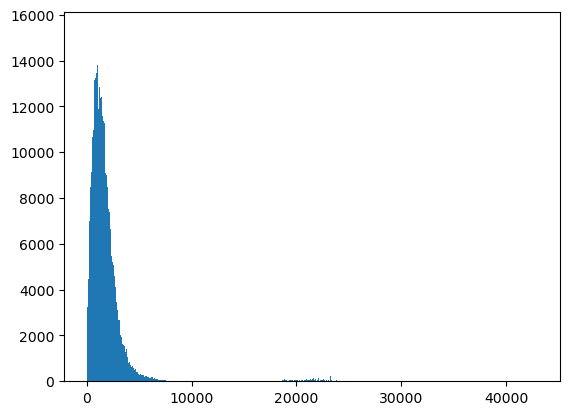

In [163]:
plt.hist("Geodesic_Distance",bins = np.arange(0,43000,20), data = df)
plt.show()


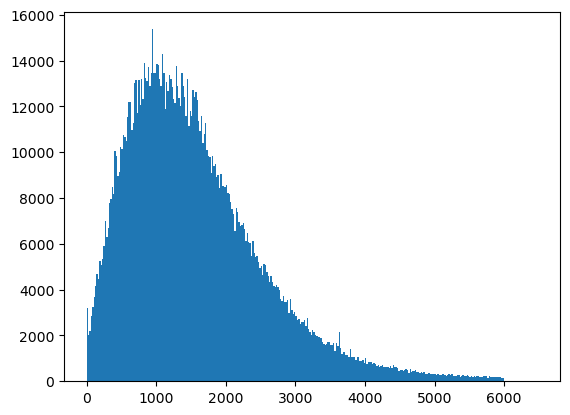

In [162]:
plt.hist("Geodesic_Distance",bins = np.arange(0,6500,20), data = df[df.Geodesic_Distance<=6000])
plt.show()


In [71]:
df[(df.FirstPumpArriving_AttendanceTime >= 900)]

,IncidentNumber,DateOfCall,Month,Weekday,CalYear,TimeOfCall,HourOfCall,Periode,Periode_Rush,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,Latitude_Station,Longitude_Station,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Mob_FirstPump_AttendanceTime,FirstPump_DelayCode_Description,FirstPump_Division_staion,SecondPumpArriving_TurnoutTimeSec,SecondPumpArriving_TravelTimeSec,Mob_SecondPump_AttendanceTime,SecondPump_DelayCode_Description,SecondPump_Division_staion,London_Zone,FirstPump_Delayed,SecondPump_Delayed,Covid_Lockdown,Geodesic_Distance
164,325091,2009-01-01,1,4,2009,1900-01-01 11:13:37,11,Matin,No rush,False Alarm,AFA,NaN,Non Residential,Shopping Centre,Correct incident location,SW19 8NP,SW19,MERTON,Wimbledon Town & Dundonald,525203.0,170867.0,525250,170850,51.422993,-0.200639,Wimbledon,957.0,Wimbledon,51.415558,-0.197346,NaN,NaN,1.0,1.0,1,60,255,2.0,347.0,610.0,957,"Traffic, roadworks, etc",H,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,858.343308
166,329091,2009-01-01,1,4,2009,1900-01-01 11:21:50,11,Matin,No rush,Special Service,Special Service,Lift Release,Non Residential,Single shop,Correct incident location,W1C 1DN,W1C,WESTMINSTER,West End,528902.0,181235.0,528950,181250,51.515342,-0.143689,Soho,1032.0,Euston,51.527725,-0.130642,NaN,NaN,1.0,1.0,1,60,255,1.0,106.0,926.0,1032,Address incomplete/wrong,A,NaN,NaN,NaN,NaN,NaN,Inner London,1,0,0,1648.645549
380,709091,2009-01-02,1,5,2009,1900-01-01 00:46:44,0,Nuit,No rush,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,On land associated with building,IG8 7QQ,IG8,REDBRIDGE,Bridge,541106.0,191876.0,541150,191850,51.608045,0.036344,Woodford,907.0,Woodford,51.609354,0.024098,NaN,NaN,1.0,1.0,1,60,255,1.0,153.0,754.0,907,Address incomplete/wrong,F,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,860.766051
533,988091,2009-01-02,1,5,2009,1900-01-01 16:05:54,16,Midi,No rush,False Alarm,AFA,NaN,Non Residential,Converted office,Within same building,HA7 3HD,HA7,HARROW,Stanmore,516197.0,193209.0,516150,193250,51.625714,-0.322744,Stanmore,922.0,Mill Hill,51.615246,-0.243469,NaN,NaN,1.0,1.0,1,60,255,1.0,133.0,789.0,922,Not held up,A,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,5612.568359
1096,2016091,2009-01-04,1,7,2009,1900-01-01 06:54:30,6,Matin,No rush,Fire,Primary Fire,NaN,Road Vehicle,Car,In street outside gazetteer location,NW4 4AJ,NW4,BARNET,Hendon,522762.0,189087.0,522750,189050,51.587277,-0.229391,Hendon,953.0,Hendon,51.588906,-0.228753,NaN,NaN,1.0,1.0,1,60,255,1.0,116.0,837.0,953,Not held up,A,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,186.563654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506452,168721-29102023,2023-10-29,10,7,2023,1900-01-01 00:32:41,0,Nuit,No rush,Special Service,Special Service,Advice Only,Road Vehicle,Car,In street outside gazetteer location,NW7 2JU,NW7,BARNET,Mill Hill,521348.0,191900.0,521350,191950,51.612868,-0.248814,Mill Hill,942.0,West Hampstead,51.551785,-0.192907,NaN,NaN,1.0,1.0,1,60,388,1.0,31.0,911.0,942,"Traffic, roadworks, etc",A,NaN,NaN,NaN,NaN,NaN,Outer London,1,0,0,7823.275587
1506460,168736-29102023,2023-10-29,10,7,2023,1900-01-01 01:08:23,1,Nuit,No rush,False Alarm,AFA,NaN,Non Residential,Single shop,Correct incident location,BR2 7EB,BR2,BROMLEY,Hayes & Coney Hall,540090.0,166060.0,540050,166050,51.376322,0.011453,Bromley,1086.0,Bromley,51.407021,0.017033,NaN,NaN,1.0,1.0,1,60,388,2.0,145.0,941.

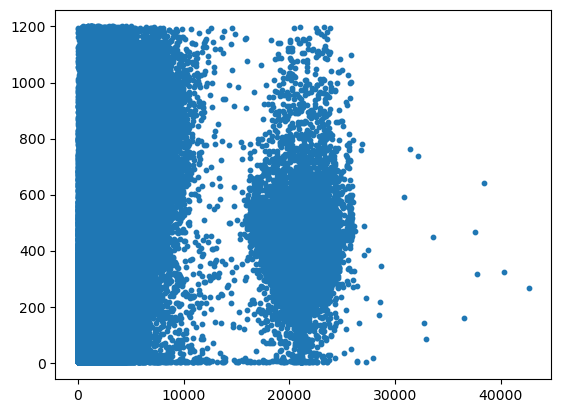

In [164]:
plt.scatter(df.Geodesic_Distance,df.FirstPumpArriving_AttendanceTime, s = 10)
plt.show()

In [165]:
# suppression des infos des second camions arrivés
col_second = ["SecondPumpArriving_AttendanceTime","SecondPumpArriving_DeployedFromStation"
              ,"Mob_FirstPump_AttendanceTime","SecondPumpArriving_TurnoutTimeSec","SecondPumpArriving_TravelTimeSec",
             "Mob_SecondPump_AttendanceTime","SecondPump_DelayCode_Description","SecondPump_Division_staion","SecondPump_Delayed"]


df = df.drop(col_second, axis = 1)


### Création de deux data frame :
#### - Data_A_Encoder_V1 : suppression des lignes où on avait des Na dans les coordonnées (correspond aux index où il y a dwelling)
#### - Data_A_Encoder_V2 : Conserve les lignes

In [166]:
df_V1 = df.copy()
df_V2 = df.copy()

In [169]:
print(df_V1[-(df_V1.PropertyCategory == "Dwelling")].shape)
print(df_V1.shape)

(769112, 45)
(1464680, 45)


In [170]:
# retrait des lignes où on avait des NA au coordonnées à la base
df_V1 = df_V1[-(df_V1.PropertyCategory == "Dwelling")]

In [171]:
# DF à encoder V1 : supprime les lignes où il y a des Na dans les coordonnées
df_V1.to_csv("Data/Data_A_Encoder_V1.csv",index=False)

# DF à encoder V2 : conserve les lignes où il y a des Na dans les coordonnées
df_V2.to_csv("Data/Data_A_Encoder_V2.csv",index=False)

In [4]:
dfV1 = pd.read_csv("Data/Data_A_Encoder_V1.csv")
#conserve les lignes où il y a des Na dans les coordonnées
dfV2 = pd.read_csv("Data/Data_A_Encoder_V2.csv")

C:\Users\loreb\AppData\Local\Temp\ipykernel_4852\2861895352.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dfV1 = pd.read_csv("Data/Data_A_Encoder_V1.csv")
C:\Users\loreb\AppData\Local\Temp\ipykernel_4852\2861895352.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dfV2 = pd.read_csv("Data/Data_A_Encoder_V2.csv")


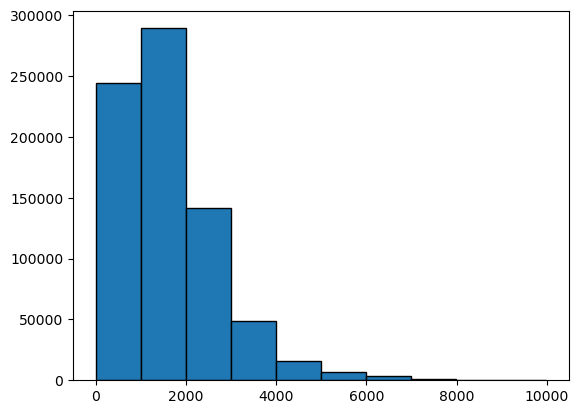

In [10]:
# distribution pour les distances inf à 10 km
plt.hist("Geodesic_Distance" ,data = df[df.Geodesic_Distance <10000],edgecolor = "black")
plt.show()

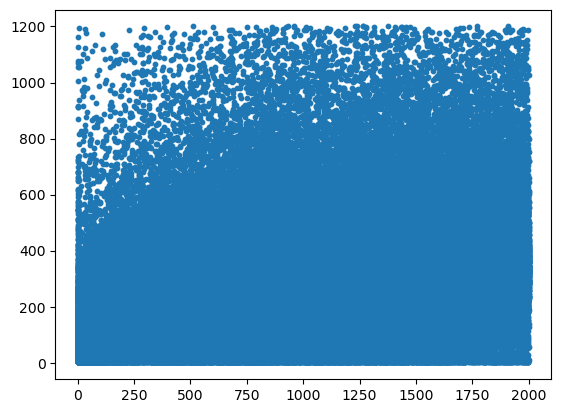

In [15]:
plt.scatter(x = "Geodesic_Distance",y ="FirstPumpArriving_AttendanceTime", s= 10, data = df[df.Geodesic_Distance <=2000])
plt.show()

In [18]:
df.columns

Index(['IncidentNumber', 'DateOfCall', 'Month', 'Weekday', 'CalYear',
       'TimeOfCall', 'HourOfCall', 'Periode', 'Periode_Rush', 'IncidentGroup',
       'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory',
       'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'IncGeo_BoroughName', 'IncGeo_WardNameNew',
       'Easting_m', 'Northing_m', 'Easting_rounded', 'Northing_rounded',
       'Latitude', 'Longitude', 'IncidentStationGround',
       'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation', 'Latitude_Station',
       'Longitude_Station', 'NumStationsWithPumpsAttending',
       'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded',
       'Notional Cost (£)', 'NumCalls', 'FirstPumpArriving_TurnoutTimeSec',
       'FirstPumpArriving_TravelTimeSec', 'FirstPump_DelayCode_Description',
       'FirstPump_Division_staion', 'London_Zone', 'FirstPump_Delayed',
       'Covid_Lockdown', 'Geodesic_Distance'],
      dtyp

In [22]:
df[df.Geodesic_Distance < 10][["FirstPumpArriving_AttendanceTime","FirstPumpArriving_TurnoutTimeSec","FirstPumpArriving_TravelTimeSec","Geodesic_Distance"]].head(30)


,FirstPumpArriving_AttendanceTime,FirstPumpArriving_TurnoutTimeSec,FirstPumpArriving_TravelTimeSec,Geodesic_Distance
756,28.0,NaN,NaN,7.224841
784,491.0,8.0,483.0,7.224841
1366,259.0,129.0,130.0,0.990988
1518,50.0,NaN,NaN,0.990988
1525,173.0,93.0,80.0,1.442170
2154,370.0,NaN,NaN,1.050733
2551,246.0,NaN,NaN,1.014283
2790,24.0,NaN,NaN,8.426067
5331,68.0,NaN,NaN,1.019200
6001,250.0,NaN,NaN,0.942385


In [7]:
dfV2.PropertyCategory.value_counts()

PropertyCategory
Dwelling             695568
Non Residential      344767
Outdoor              131473
Road Vehicle         112937
Other Residential     90088
Outdoor Structure     86876
Rail Vehicle           1271
Aircraft               1078
Boat                    622
Name: count, dtype: int64

In [14]:
dfV2.groupby(["Weekday","FirstPump_Delayed"])['FirstPumpArriving_AttendanceTime'].agg(['mean',"median","std","count"])



mean  median         std   count
Weekday FirstPump_Delayed                                        
1       0                  251.816351   259.0   71.272176  147760
        1                  481.098455   438.0  132.251619   58981
2       0                  253.100470   260.0   70.533455  146352
        1                  481.785335   440.0  131.186806   60527
3       0                  253.056537   260.0   71.019246  144365
        1                  481.022247   439.0  131.110949   61222
4       0                  253.022621   260.0   71.070611  146544
        1                  481.236513   439.0  131.041184   61502
5       0                  253.327632   261.0   71.284545  147693
        1                  482.646165   440.0  132.300681   64434
6       0                  252.445073   259.0   70.838522  154768
        1                  481.869368   438.0  133.750237   62741
7       0                  251.710769   258.0   70.128816  151588
        1                  477.527801   434.0  130.884561   56203

In [11]:
dfV2.groupby(["Weekday"])['FirstPump_Delayed'].agg(['mean',"count"])


,mean,count
Weekday,,
1,0.285289,206741
2,0.292572,206879
3,0.297791,205587
4,0.295617,208046
5,0.303752,212127
6,0.288452,217509
7,0.270479,207791


In [17]:
# stat du temps de réponse en fonction du jour
dfV2.groupby("Weekday")['FirstPumpArriving_AttendanceTime'].agg(['mean',"median",'var','std'])

,mean,median,var,std
Weekday,,,,
1,317.228087,295.0,19339.412274,139.066215
2,320.007255,298.0,19378.627066,139.207137
3,320.942720,299.0,19527.983596,139.742562
4,320.486599,299.0,19478.953737,139.567022
5,322.983595,300.0,19976.126391,141.336925
6,318.623068,296.0,19534.073436,139.764350
7,312.789423,292.0,18283.308802,135.215786
